<a href="https://colab.research.google.com/github/Joyfreaky/IntelligentCyberBot/blob/master/FineTune_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q azure-storage-blob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
!pip install -q azure-identity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.7 MB/s eta 0:00:00


In [ ]:
!pip install -q azure-keyvault

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.1/428.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.6/348.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.7/452.7 kB 14.4 MB/s eta 0:00:00


In [ ]:
!pip install -q azure-cli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.5/804.5 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
!az login

To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code A63A89CVQ to authenticate.
[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "bdb74b30-9568-4856-bdbf-06759778fcbc",
    "id": "c71ba208-c56c-4a0d-811f-4334207e261f",
    "isDefault": true,
    "managedByTenants": [],
    "name": "Azure for Students",
    "state": "Enabled",
    "tenantId": "bdb74b30-9568-4856-bdbf-06759778fcbc",
    "user": {
      "name": "BhowmickJ@cardiff.ac.uk",
      "type": "user"
    }
  }
]


In [ ]:
from azure.identity import DefaultAzureCredential
from azure.keyvault.secrets import SecretClient
from azure.storage.blob import BlobServiceClient
import pandas as pd
import csv

In [ ]:
# The URL to your Key Vault
key_vault_url = "https://cybersecuritykey.vault.azure.net/"

# The name of your secret
secret_name = "cybersecurityDataConnectionString"

# The name of your blob container
container_name = "cybersecuritydata"

# Names of the blobs for different datasets
train_blob_name = "train_df.csv"
valid_blob_name = "valid_df.csv"
test_blob_name = "test_df.csv"

# Create a credential object using the DefaultAzureCredential class
credential = DefaultAzureCredential()

# Create a secret client using the credential
secret_client = SecretClient(vault_url=key_vault_url, credential=credential)

# Retrieve the secret
secret = secret_client.get_secret(secret_name)

# Create a blob service client using the secret
blob_service_client = BlobServiceClient.from_connection_string(secret.value)

# Get a reference to the blob container
blob_container_client = blob_service_client.get_container_client(container_name)

# Get a reference to the blob
blob_client_train = blob_container_client.get_blob_client(train_blob_name)
blob_client_valid = blob_container_client.get_blob_client(valid_blob_name)
blob_client_test = blob_container_client.get_blob_client(test_blob_name)


In [ ]:
# Download the blob to a local file
with open("train_df.csv", "wb") as my_blob:
    download_stream = blob_client_train.download_blob()
    my_blob.write(download_stream.readall())

# Load the CSV file into a Pandas DataFrame
train_df = pd.read_csv("train_df.csv")

# Print the DataFrame
train_df.head(10)

labels                                            feature
0      11  Detect Time: 2019-03-13T02:14:58Z; Event time:...
1      11  Detect Time: 2019-03-15T10:13:45Z; Event time:...
2      11  Detect Time: 2019-03-11T13:54:21+00:00; Event ...
3      11  Detect Time: 2019-03-14T03:52:41Z; Event time:...
4      11  Detect Time: 2019-03-16T20:29:50Z; Event time:...
5      11  Detect Time: 2019-03-15T17:11:00Z; Event time:...
6      11  Detect Time: 2019-03-14T16:17:01Z; Event time:...
7      11  Detect Time: 2019-03-16T04:35:22Z; Event time:...
8       3  Detect Time: 2019-03-12T13:44:11Z; Event time:...
9      11  Detect Time: 2019-03-14T15:15:42Z; Event time:...

In [ ]:
# Download the blob to a local file
with open("valid_df.csv", "wb") as my_blob:
    download_stream = blob_client_valid.download_blob()
    my_blob.write(download_stream.readall())

# Load the CSV file into a Pandas DataFrame
valid_df = pd.read_csv("valid_df.csv")

# Print the DataFrame
valid_df.head(10)

labels                                            feature
0      11  Detect Time: 2019-03-15T05:49:37Z; Event time:...
1       7  Detect Time: 2019-03-13T15:06:41+01:00; Event ...
2      11  Detect Time: 2019-03-11T07:29:55Z; Event time:...
3       3  Detect Time: 2019-03-15T12:48:15Z; Event time:...
4      11  Detect Time: 2019-03-12T07:46:02Z; Event time:...
5      11  Detect Time: 2019-03-14T06:36:07Z; Event time:...
6       3  Detect Time: 2019-03-13T19:24:36Z; Event time:...
7      11  Detect Time: 2019-03-16T20:57:47Z; Event time:...
8      11  Detect Time: 2019-03-15T09:37:10Z; Event time:...
9      11  Detect Time: 2019-03-11T12:01:16Z; Event time:...

In [ ]:
# Download the blob to a local file
with open("test_df.csv", "wb") as my_blob:
    download_stream = blob_client_test.download_blob()
    my_blob.write(download_stream.readall())

# Load the CSV file into a Pandas DataFrame
test_df = pd.read_csv("test_df.csv")

# Print the DataFrame
test_df.head(10)

labels                                            feature
0      11  Detect Time: 2019-03-13T20:14:50Z; Event time:...
1      11  Detect Time: 2019-03-13T07:11:08Z; Event time:...
2       2  Detect Time: 2019-03-15T19:58:47Z; Event time:...
3      11  Detect Time: 2019-03-16T02:56:26Z; Event time:...
4      11  Detect Time: 2019-03-12T09:12:27Z; Event time:...
5      11  Detect Time: 2019-03-14T10:05:16Z; Event time:...
6      11  Detect Time: 2019-03-11T02:37:04Z; Event time:...
7      11  Detect Time: 2019-03-16T19:42:59Z; Event time:...
8      11  Detect Time: 2019-03-11T06:44:01Z; Event time:...
9      11  Detect Time: 2019-03-12T07:07:54Z; Event time:...

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [ ]:
# Check if a GPU is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    gpu_count = torch.cuda.device_count()
    print(f"Number of available GPUs: {gpu_count}")

    # Get information about each GPU
    for i in range(gpu_count):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i + 1}: {gpu_name}")

        gpu_memory = torch.cuda.get_device_properties(i).total_memory
        print(f"  Total GPU memory: {gpu_memory / (1024 ** 2):.2f} MB")

        gpu_capability = torch.cuda.get_device_capability(i)
        print(f"  Compute capability: {gpu_capability}")

else:
    print("No GPU available. Running on CPU.")

Number of available GPUs: 1
GPU 1: Tesla V100-SXM2-16GB
  Total GPU memory: 16150.88 MB
  Compute capability: (7, 0)


In [ ]:
# Import BERT Model and BERT Tokenizer

# Import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased', return_dict= False)

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Run a sample tonekinzation to test

# sample data
text = ["this is a bert model test", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True)

# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 3231, 102, 0, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<Axes: >

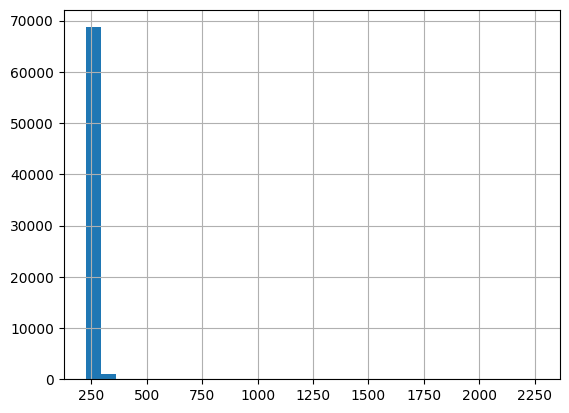

In [ ]:
# Distribution in the trainset to find the right padding length for tonkenization

# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_df['feature']]

pd.Series(seq_len).hist(bins = 30)

<Axes: >

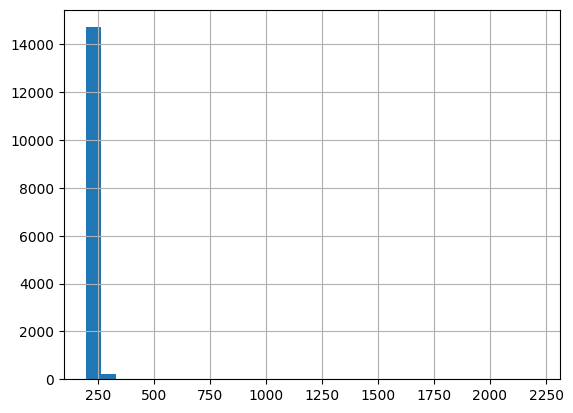

In [ ]:
# Distribution in the Vlaidation set to find the right padding length for tonkennization

# get length of all the messages in the train set
seq_len = [len(i.split()) for i in valid_df['feature']]

pd.Series(seq_len).hist(bins = 30)

Can Clearly see that most of the messages have a length of 250 words or less, whereas the maximum length is 450, Whereas in validation set it is nearly 250. So we will set the maximum padding length to 250.  

In [ ]:
# tonkenize and encode sequences in the training set

tokens_train = tokenizer.batch_encode_plus(
    train_df['feature'].tolist(), # if not list convert it into list
    max_length = 250,
    padding='max_length',
    truncation=True
)

# Tokenize and encode sequences in the validation set

tokens_val = tokenizer.batch_encode_plus(
    valid_df['feature'].tolist(), # if not list convert it into list
    max_length = 150,
    padding='max_length',
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_df['feature'].tolist(),
    max_length = 150,
    padding='max_length',
    truncation=True
)

In [ ]:
## Convert lists to tensors ( Convert the integer sequences to tensors)

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_df['labels'].tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(valid_df['labels'].tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_df['labels'].tolist())

In [ ]:
# Create Dataloaders for both train and validation set.

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Define a batch size

batch_size = 512

# wrap tensors

train_data = TensorDataset(train_seq, train_mask, train_y)

# Sampler for sampling the data during training

train_sampler = RandomSampler(train_data)

# Dataloader for train set

train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during validation

val_sampler = SequentialSampler(val_data)

# DataLoader for validation set

val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# Define the Model Architecture - Freeze all the layers of the model before finetuning

# Freeze all the parameters

for param in bert.parameters():
  param.requires_grad = False



In [ ]:
import torch.nn as nn

class CustomBERT_Arch(nn.Module):

    def __init__(self, bert):

        super(CustomBERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 12)

        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):

        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)

        return x


In [ ]:
#num_classes = 12  # Change this based on your actual number of classes

# Pass the pre-trained BERT to our defined architecture.

model = CustomBERT_Arch(bert)  # Instantiate your BERT model

# Push the model to GPU

model = model.to(device)


In [ ]:
# Will use and improved version of the Adam optimizer

# optimizer from huggin face transformers

from transformers import AdamW

#  define the optimizer

optimizer = AdamW(model.parameters(),
                  lr = 1e-5)  # Learning rate can be lowered to make generalization better as we are dealing with smaller dataset.

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Handle the class imbalance in the dataset

from sklearn.utils.class_weight import compute_class_weight

# compute the class weights

class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(train_df['labels']), y = train_df['labels'])

print("Class Weights:", class_weights)

Class Weights: [3.43053922e+02 5.16098820e+01 1.13439344e+00 6.54756559e-01
 9.25701058e+01 2.18423845e+01 1.16638333e+02 8.73041417e+00
 1.76724747e+02 7.81758266e+00 9.56051913e+01 1.08164710e-01]


In [ ]:
# Converting list of class weights to a tensor

weights = torch.tensor(class_weights, dtype= torch.float)

# push to GPU

weights = weights.to(device)

# define the loss function
cross_entropy = nn.NLLLoss(weight=weights)

# Number of Training epochs
epochs = 100

In [ ]:
# Fine tune BERT

# function to train the model

def train():

  model.train()

  total_loss, total_accuracy = 0,0

  # empty list to save model predictions
  total_preds=[]

  #iterate over batches

  for step, batch in enumerate(train_dataloader):

    #progress update after every 50 batches.
    if step % 50 ==0 and not step == 0:
      print(' Batch {:>5,} of {:>5}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
    sent_id, mask, labels = batch
    # Clear previously calculated gradients
    model.zero_grad()
    # get model predictions for the current batch
    model.zero_grad()
    # get model predictions for the current batch
    preds = model(sent_id, mask)
    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)
    # add on to th total loss
    total_loss = total_loss + loss.item()
    # backward pass to calculate the gradients
    loss.backward()
    # clip the gradients to 1.0. it helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # update parameters
    optimizer.step()
    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()
    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len (train_dataloader)
  # Predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)

  # Check if there are predictions to concatenate

  total_preds = np.concatenate(total_preds, axis=0)
  # return the loss and Predictions
  return avg_loss, total_preds


In [ ]:
def format_time(seconds):
    minutes, seconds = divmod(int(seconds), 60)
    hours, minutes = divmod(minutes, 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"


In [ ]:
# Function for evaluating the model
import time
t0 = time.time()

def evaluate():

  print("\nEvaluating....")

  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0

  # Empty list to save the model predictions
  total_preds = []

  # Iterate over batches
  for step, batch in enumerate(val_dataloader):

    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:

      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)

      # report Progress
      print(' Batch {:>5,} of {>.5,}.'.format(step, len(val_dataloader)))

    # Push the batch to gpu

    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():

      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds, labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

    # Compute the valdation oss of the epoch

  avg_loss = total_loss / len(val_dataloader)

  # reshape the predictions in form of (number of samples, no. of classes)


  total_preds = np.concatenate(total_preds, axis=0)


  return avg_loss, total_preds





 Epoch 1 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.472
Validation Losss: 2.467


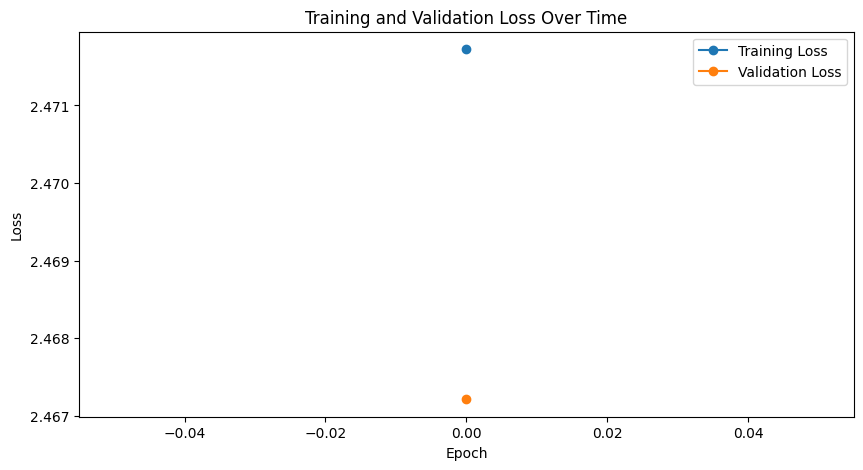


 Epoch 2 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.439
Validation Losss: 2.461


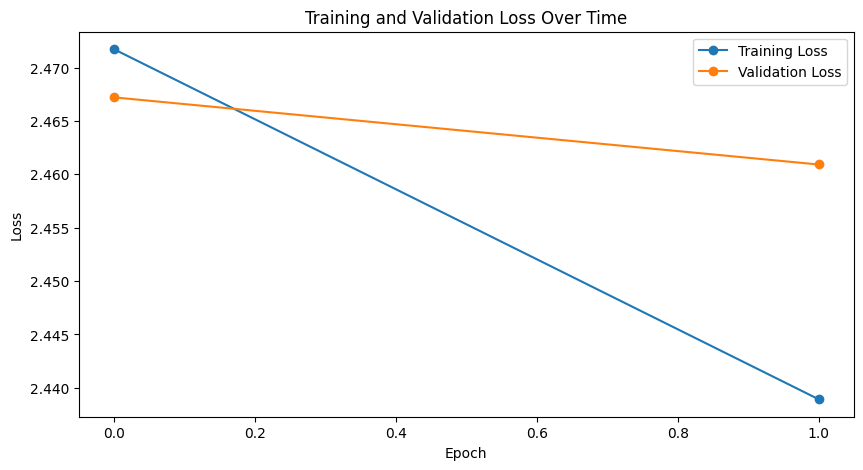


 Epoch 3 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.431
Validation Losss: 2.453


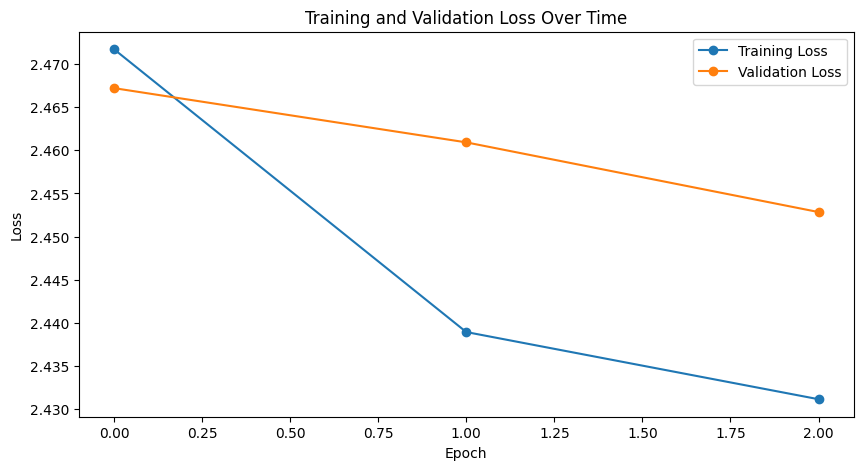


 Epoch 4 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.404
Validation Losss: 2.449


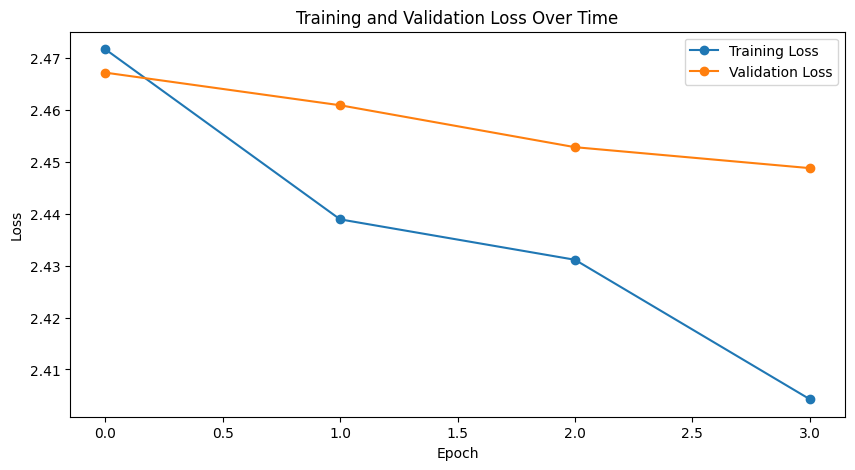


 Epoch 5 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.394
Validation Losss: 2.450


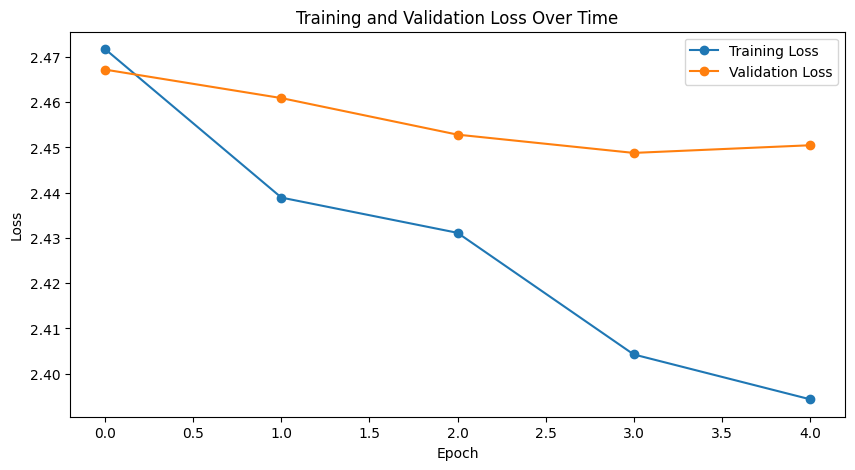


 Epoch 6 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.383
Validation Losss: 2.448


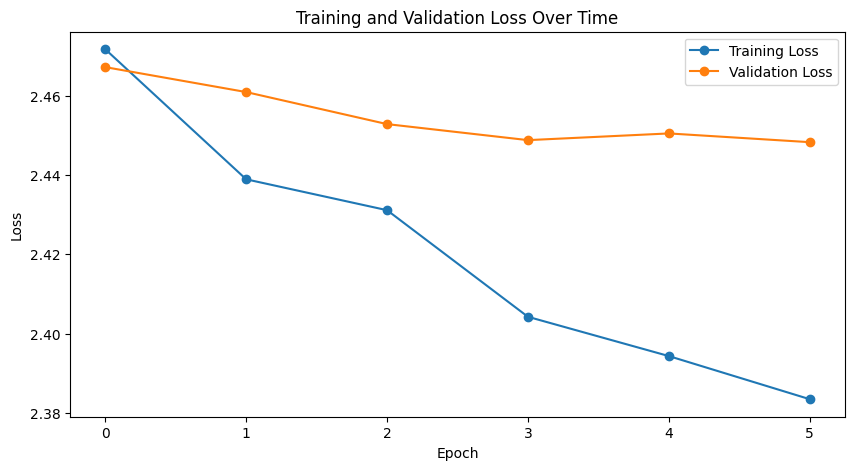


 Epoch 7 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.359
Validation Losss: 2.452


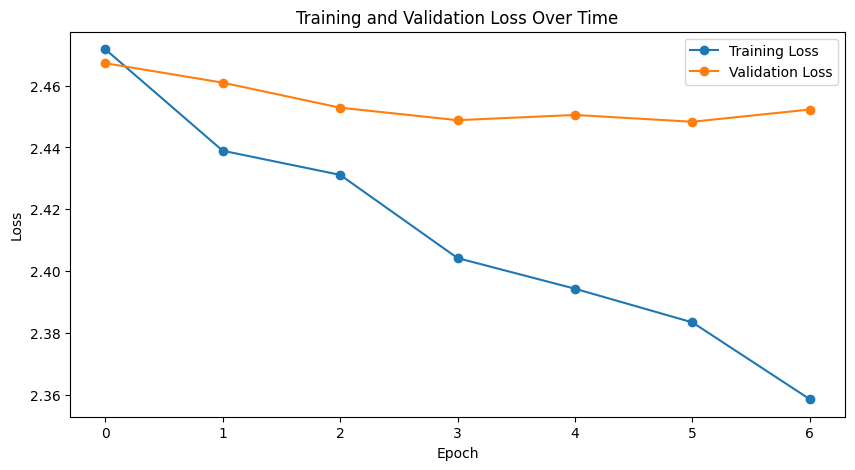


 Epoch 8 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05

Training Loss: 2.348
Validation Losss: 2.448


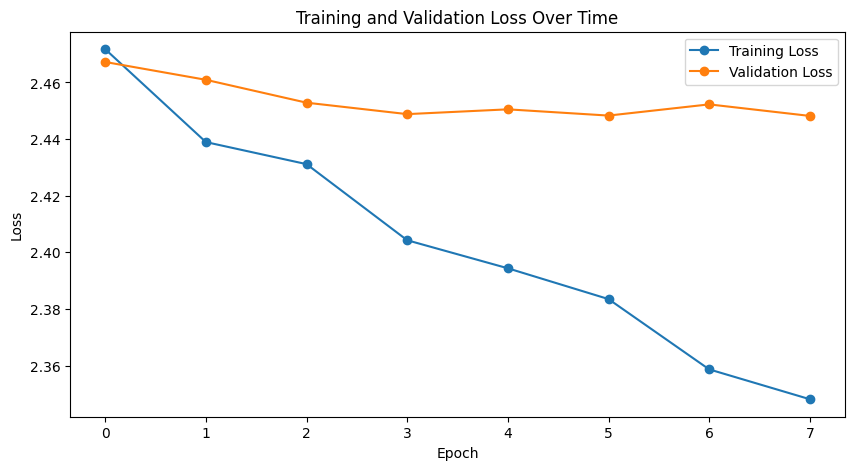


 Epoch 9 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1e-05
Epoch 00009: reducing learning rate of group 0 to 1.0000e-06.

Training Loss: 2.340
Validation Losss: 2.452


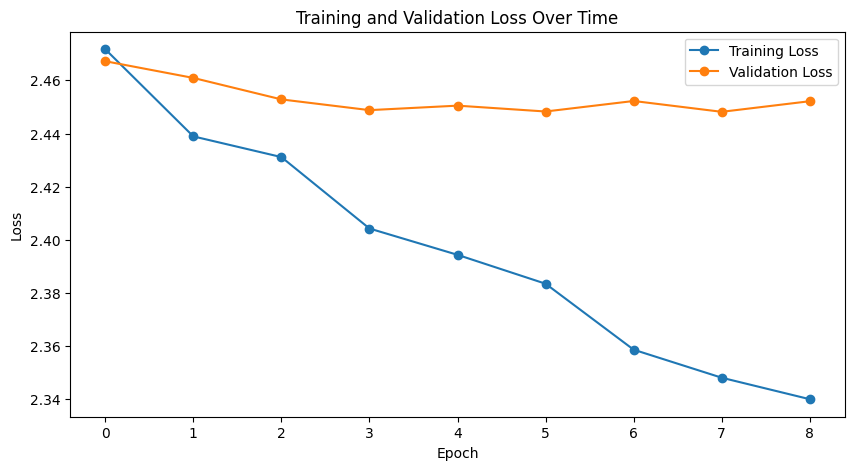


 Epoch 10 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000002e-06

Training Loss: 2.331
Validation Losss: 2.451


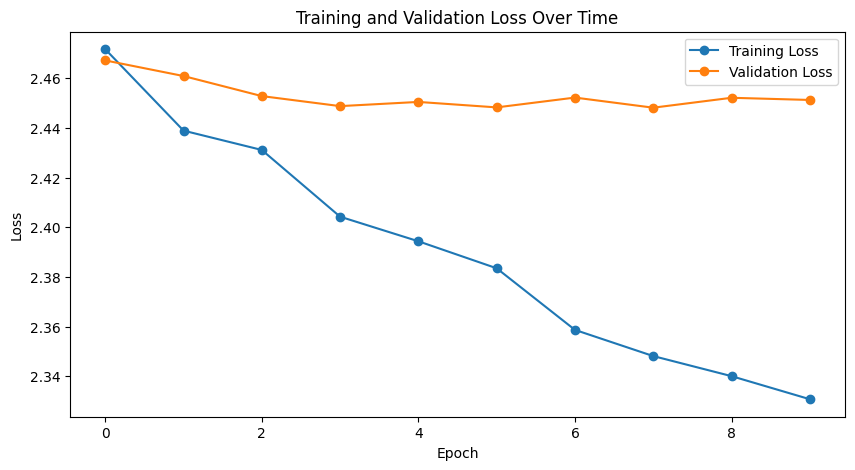


 Epoch 11 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000002e-06

Training Loss: 2.326
Validation Losss: 2.451


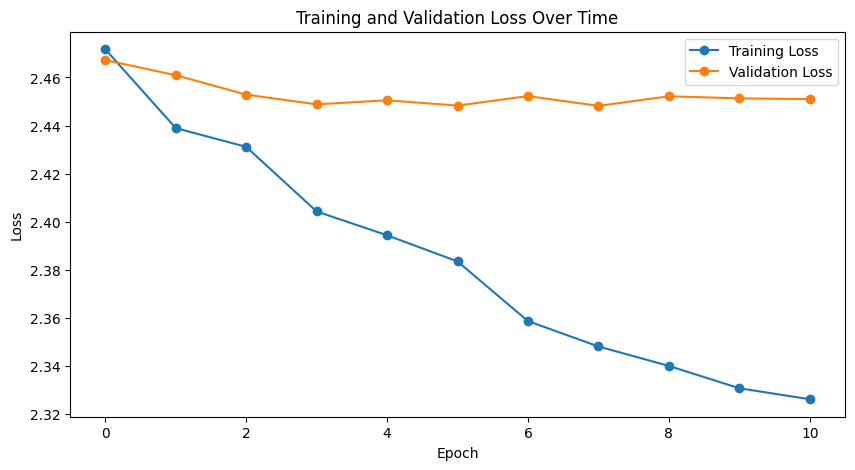


 Epoch 12 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000002e-06
Epoch 00012: reducing learning rate of group 0 to 1.0000e-07.

Training Loss: 2.325
Validation Losss: 2.451


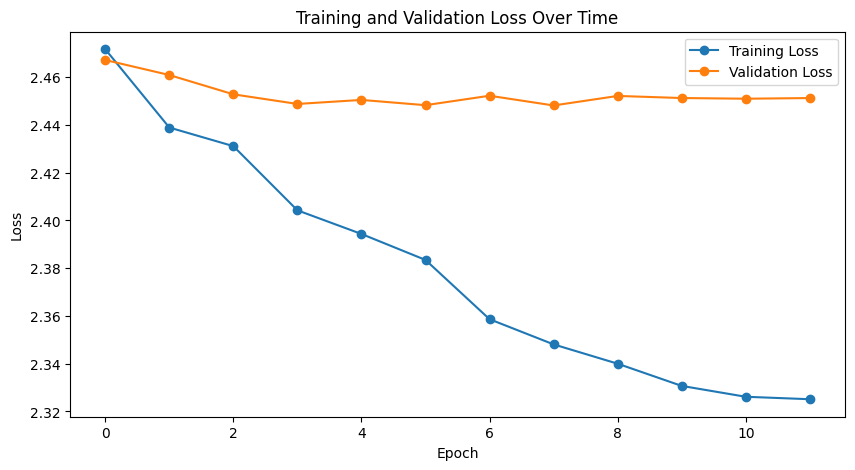


 Epoch 13 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000002e-07

Training Loss: 2.327
Validation Losss: 2.451


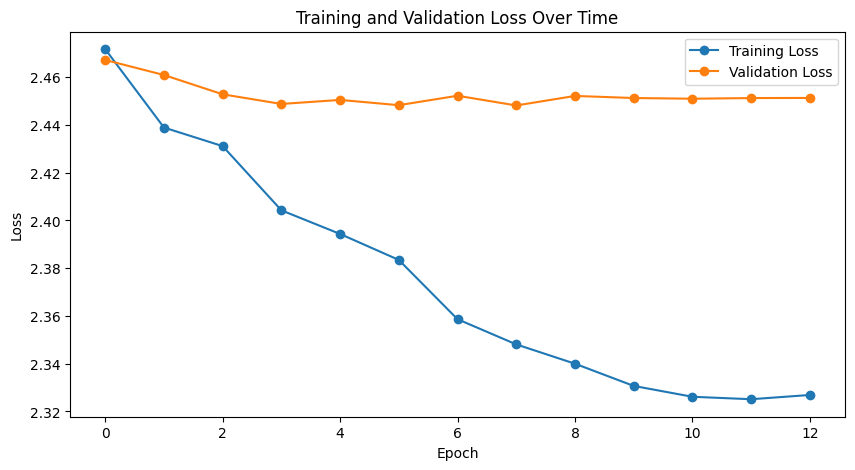


 Epoch 14 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000002e-07

Training Loss: 2.336
Validation Losss: 2.451


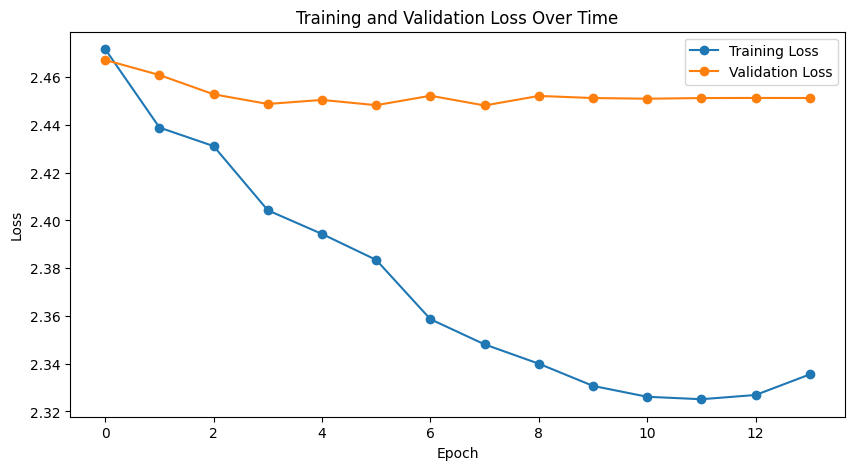


 Epoch 15 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000002e-07
Epoch 00015: reducing learning rate of group 0 to 1.0000e-08.

Training Loss: 2.327
Validation Losss: 2.451


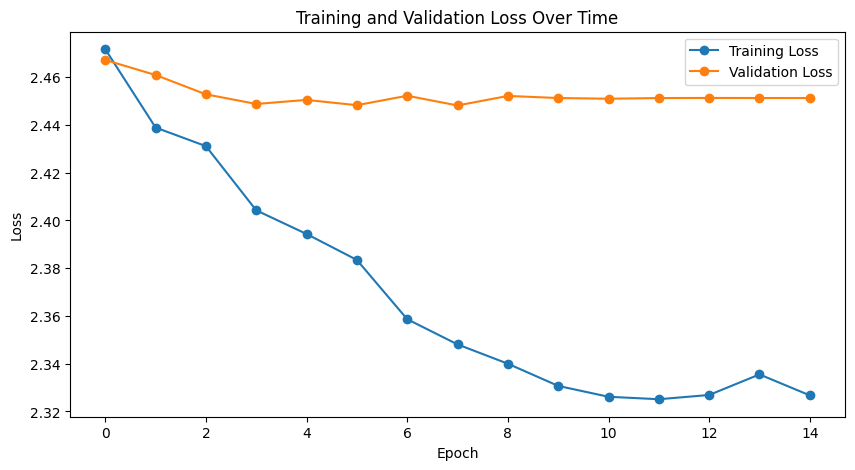


 Epoch 16 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.316
Validation Losss: 2.451


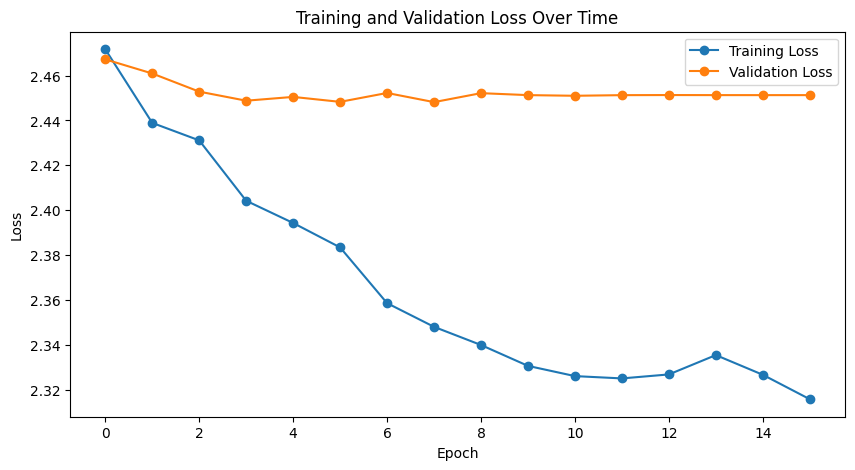


 Epoch 17 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.317
Validation Losss: 2.451


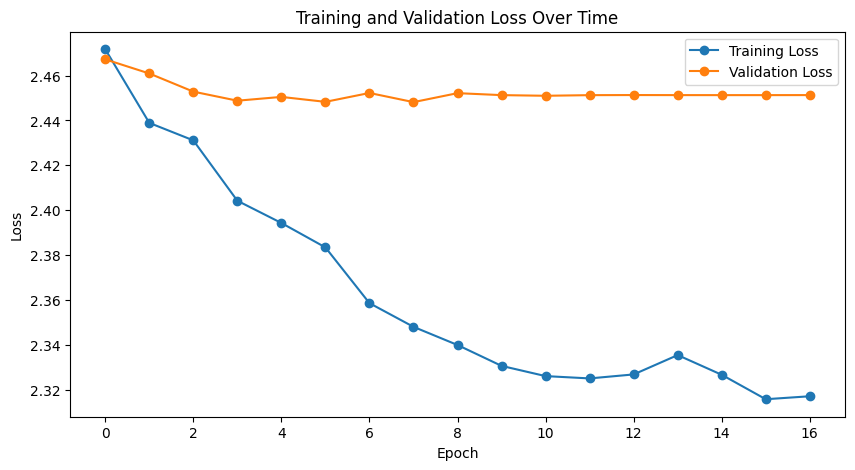


 Epoch 18 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


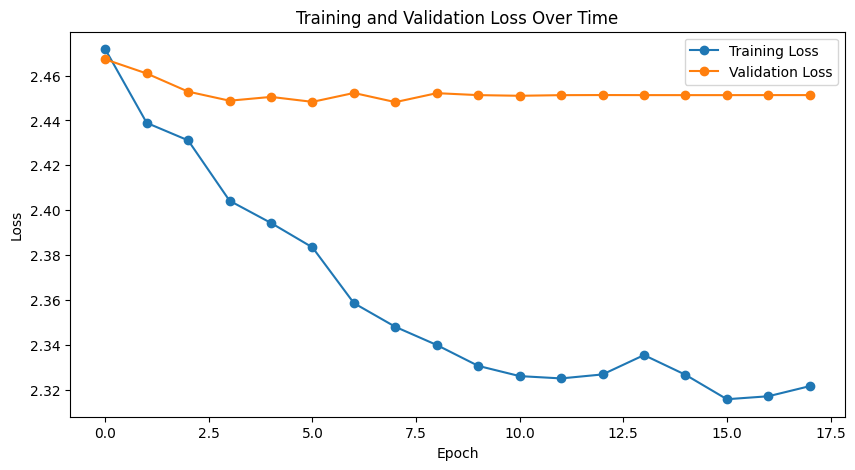


 Epoch 19 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.327
Validation Losss: 2.451


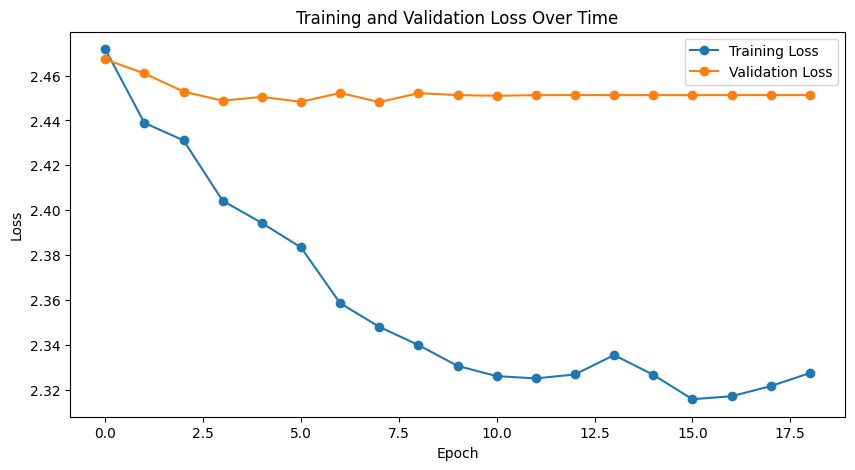


 Epoch 20 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


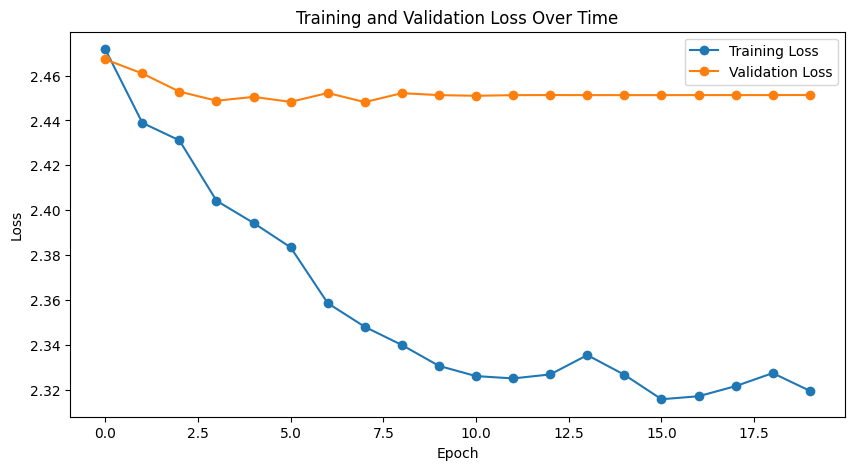


 Epoch 21 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.319
Validation Losss: 2.451


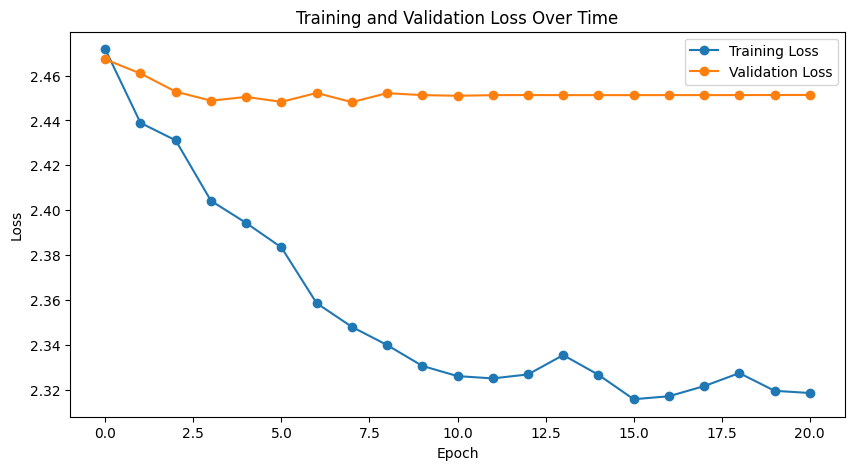


 Epoch 22 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


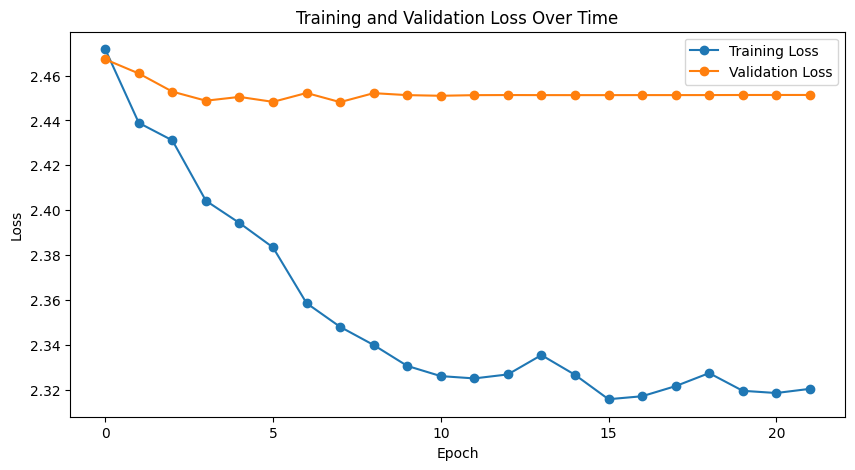


 Epoch 23 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.317
Validation Losss: 2.451


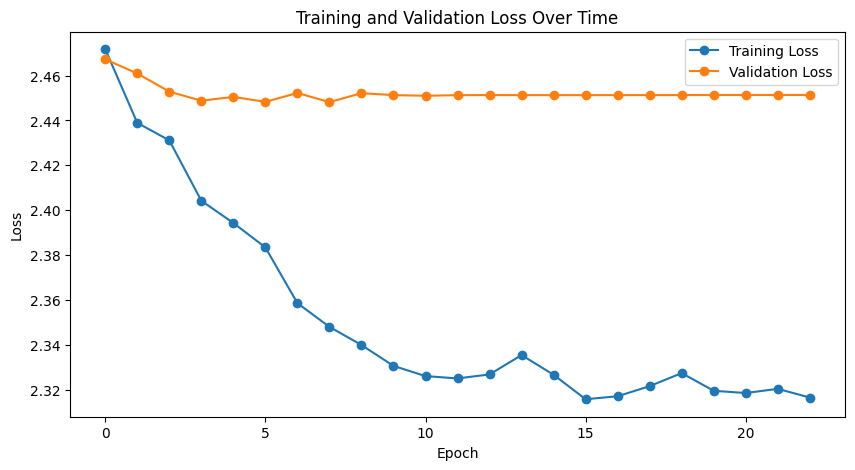


 Epoch 24 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.316
Validation Losss: 2.451


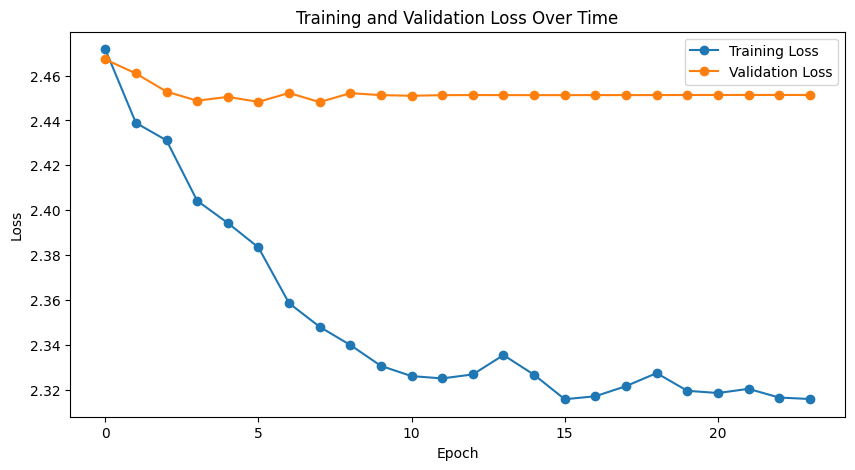


 Epoch 25 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.309
Validation Losss: 2.451


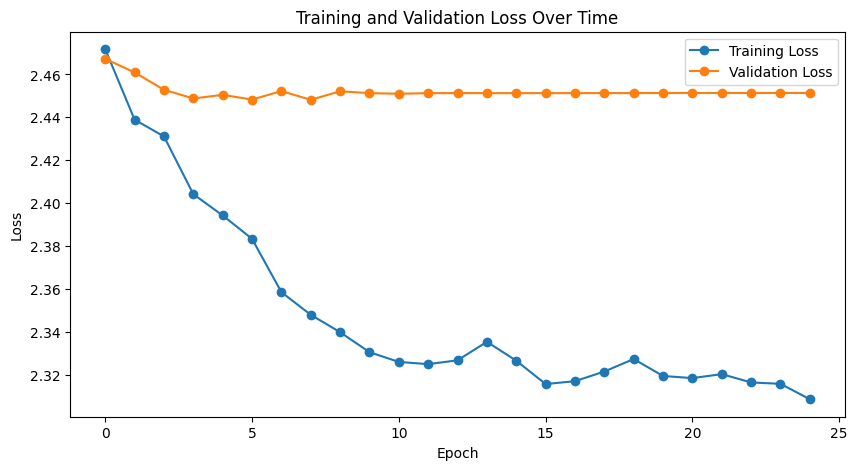


 Epoch 26 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.316
Validation Losss: 2.451


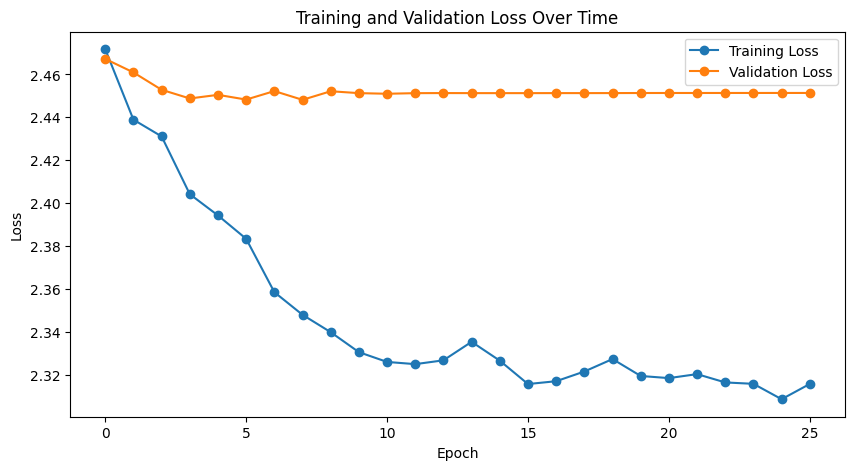


 Epoch 27 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.317
Validation Losss: 2.451


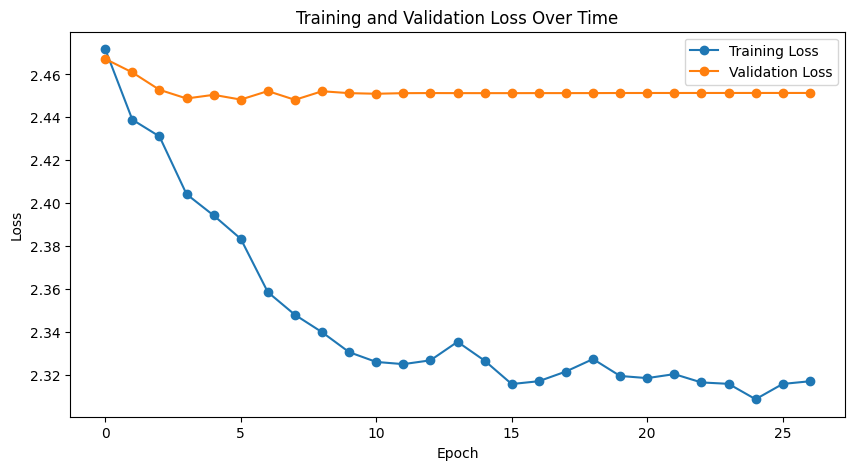


 Epoch 28 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.319
Validation Losss: 2.451


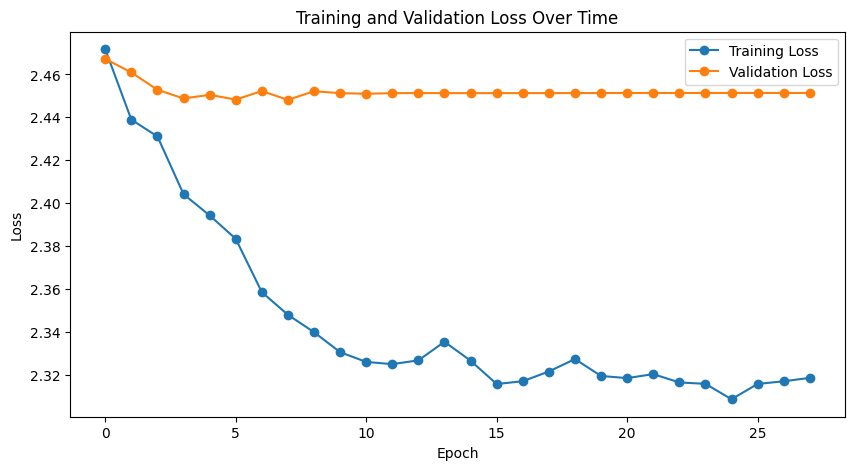


 Epoch 29 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.323
Validation Losss: 2.451


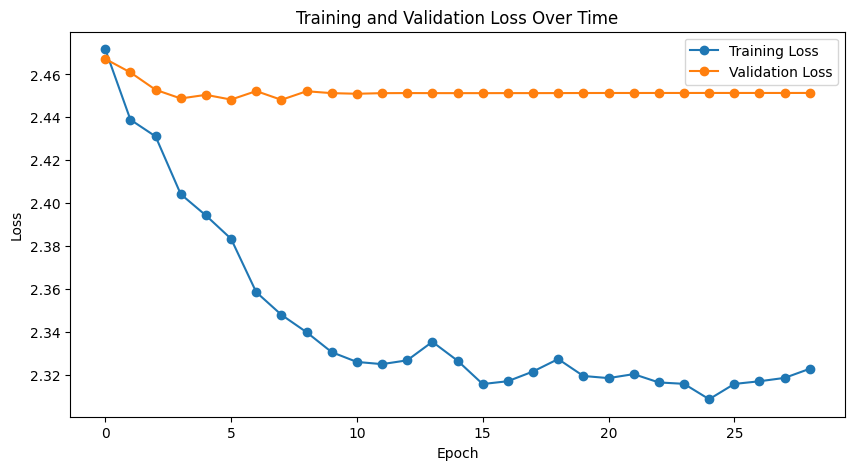


 Epoch 30 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


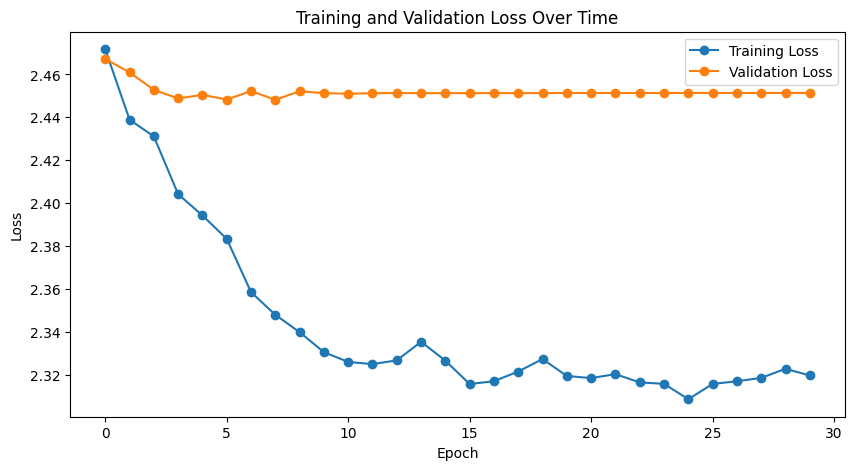


 Epoch 31 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.327
Validation Losss: 2.451


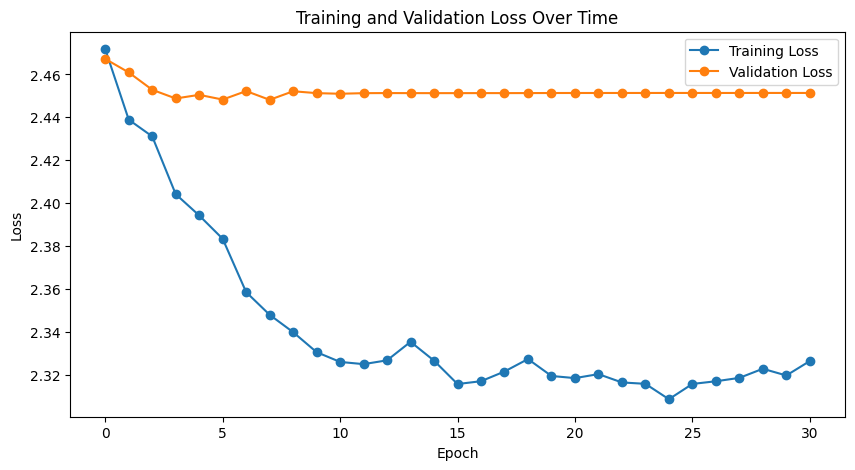


 Epoch 32 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.328
Validation Losss: 2.451


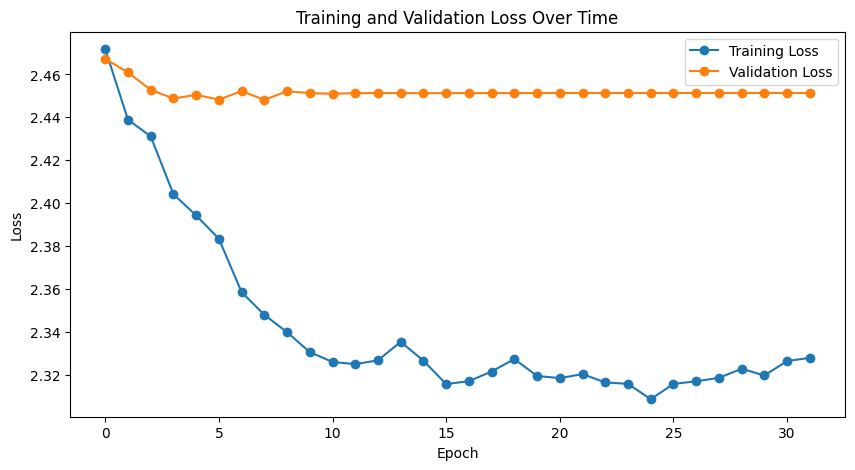


 Epoch 33 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


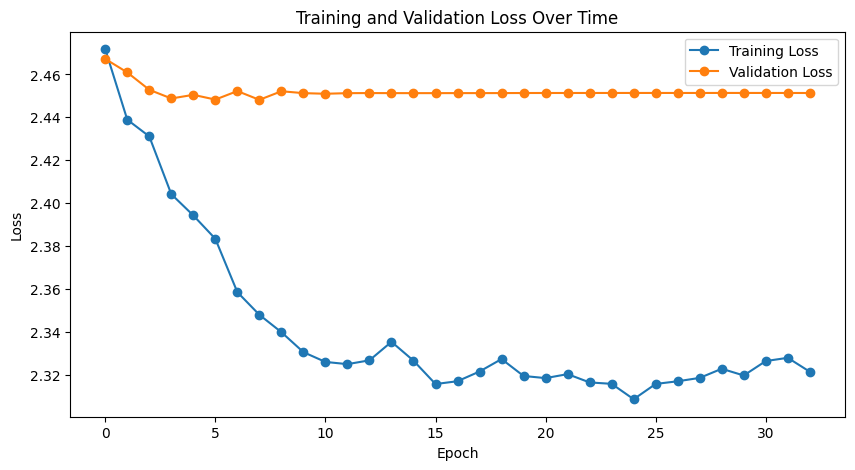


 Epoch 34 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.315
Validation Losss: 2.451


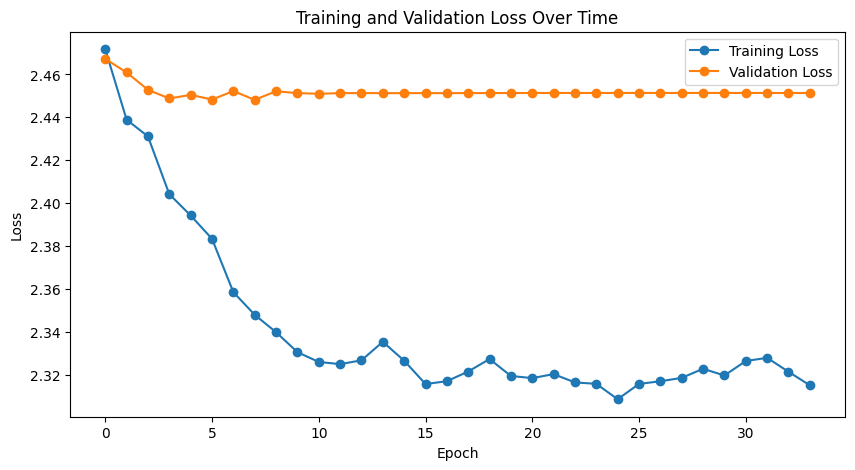


 Epoch 35 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.309
Validation Losss: 2.451


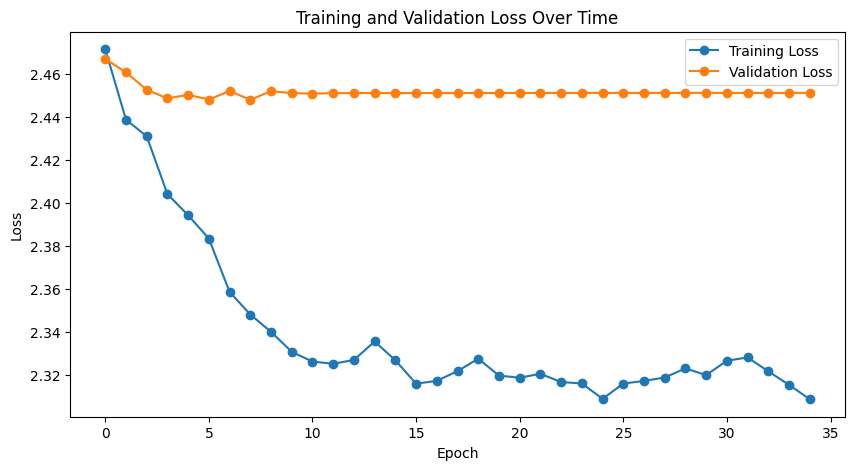


 Epoch 36 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


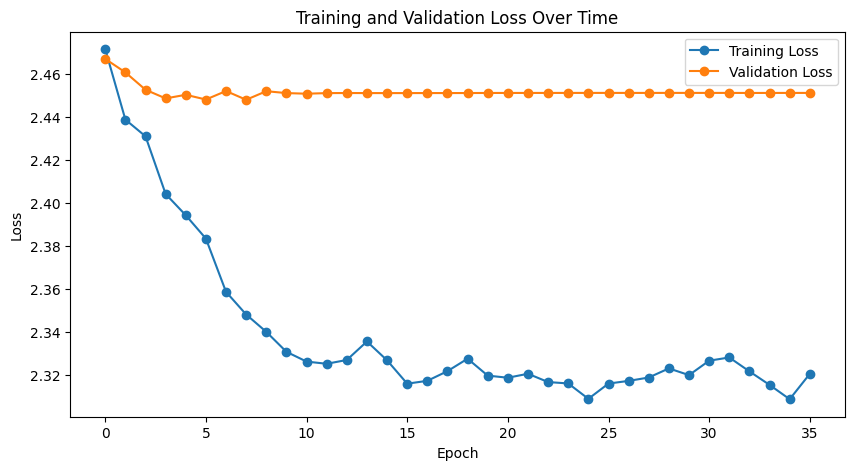


 Epoch 37 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.314
Validation Losss: 2.451


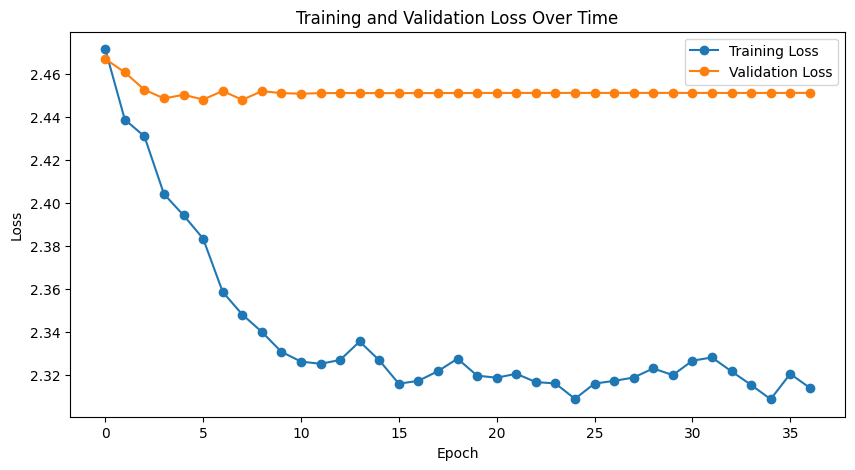


 Epoch 38 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.317
Validation Losss: 2.451


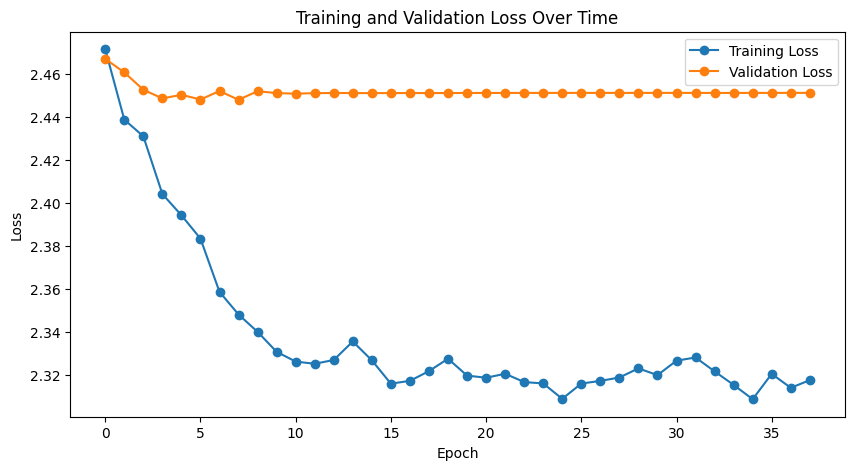


 Epoch 39 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.310
Validation Losss: 2.451


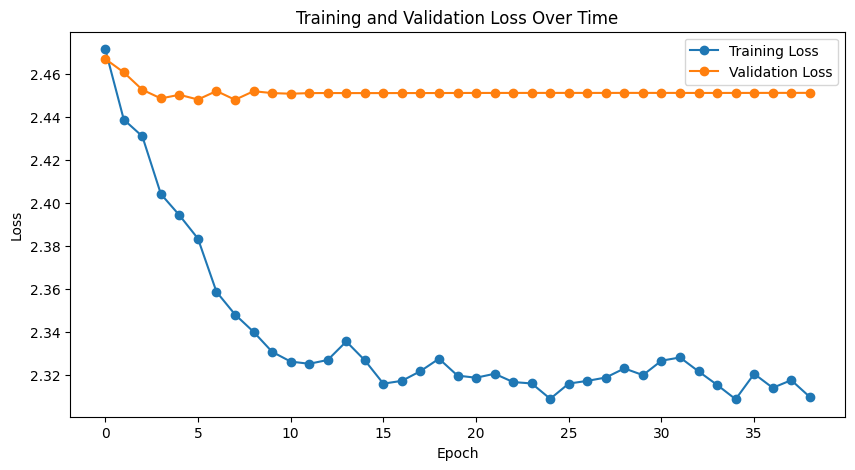


 Epoch 40 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.328
Validation Losss: 2.451


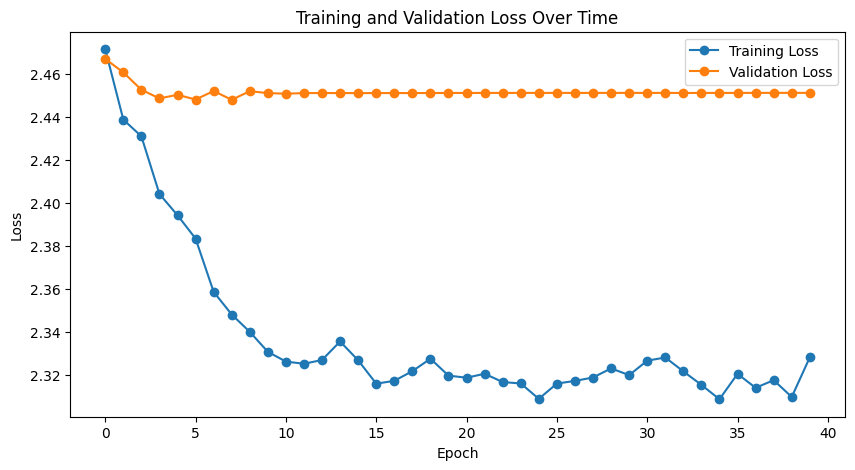


 Epoch 41 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.328
Validation Losss: 2.451


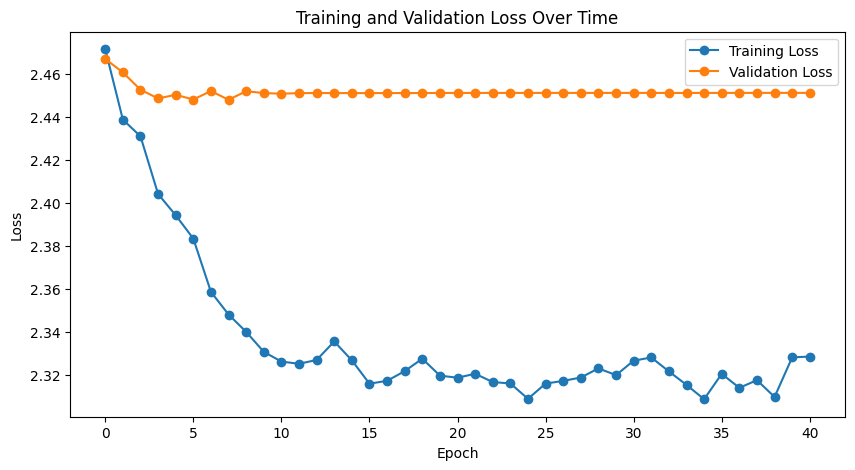


 Epoch 42 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.325
Validation Losss: 2.451


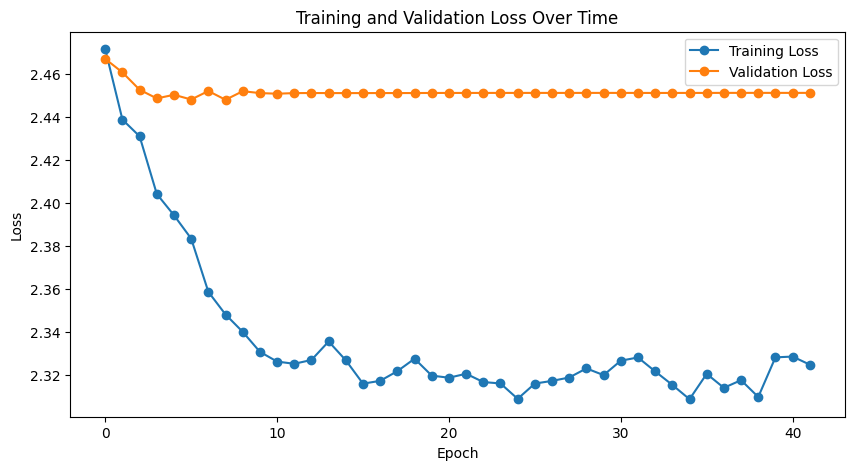


 Epoch 43 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.317
Validation Losss: 2.451


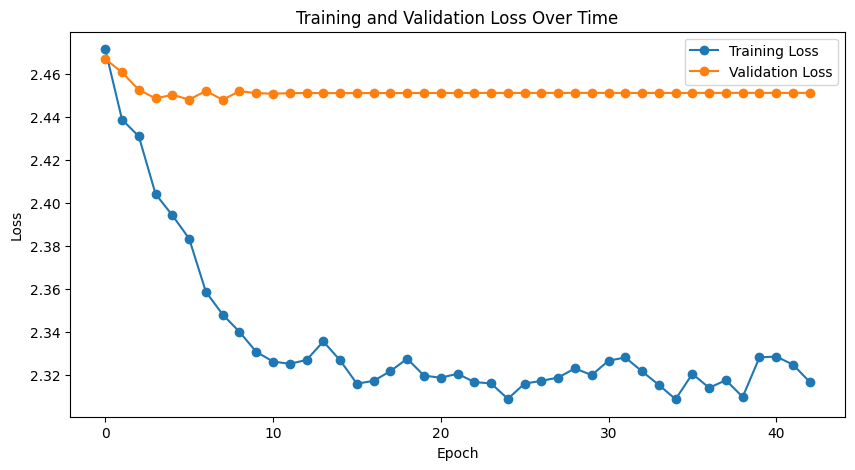


 Epoch 44 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.325
Validation Losss: 2.451


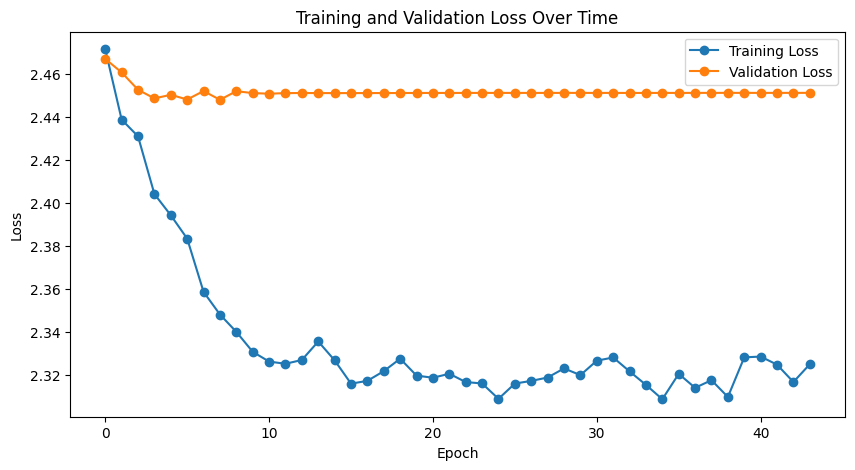


 Epoch 45 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


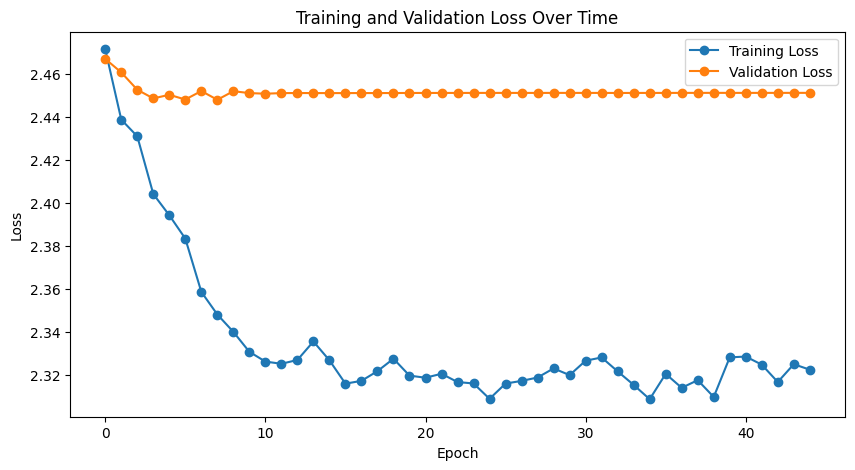


 Epoch 46 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.321
Validation Losss: 2.451


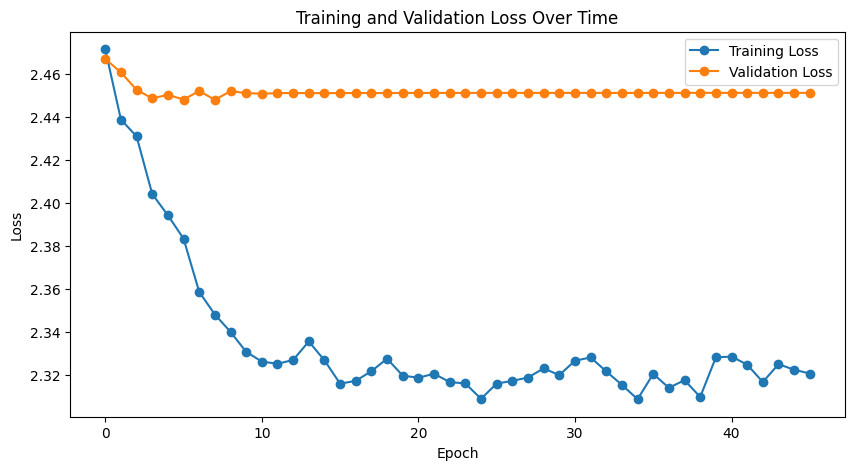


 Epoch 47 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.315
Validation Losss: 2.451


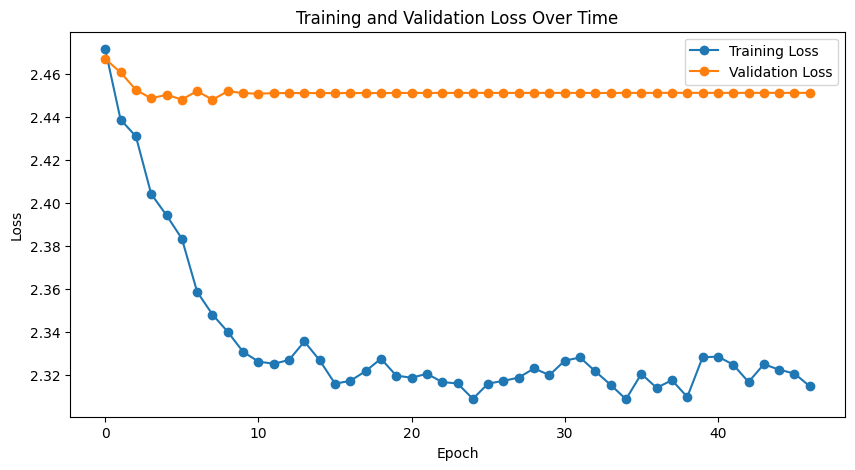


 Epoch 48 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


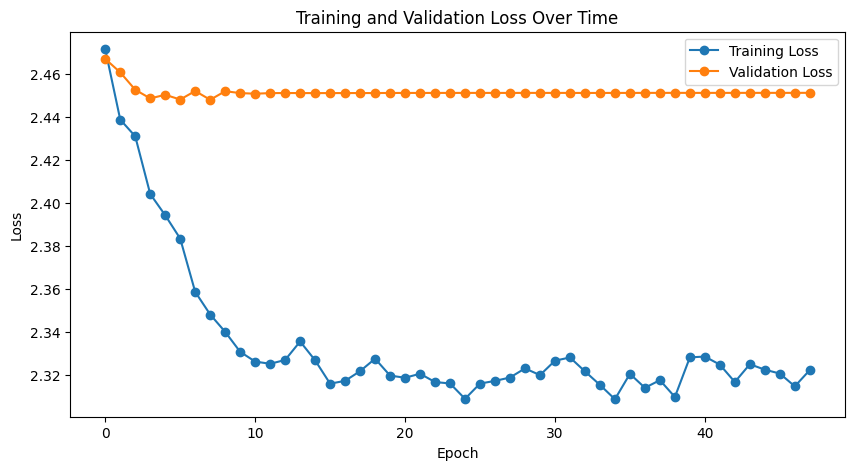


 Epoch 49 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.308
Validation Losss: 2.451


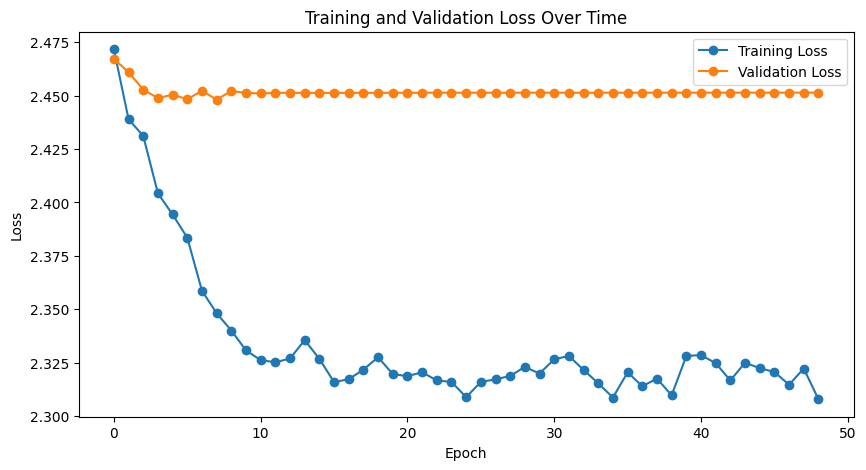


 Epoch 50 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.325
Validation Losss: 2.451


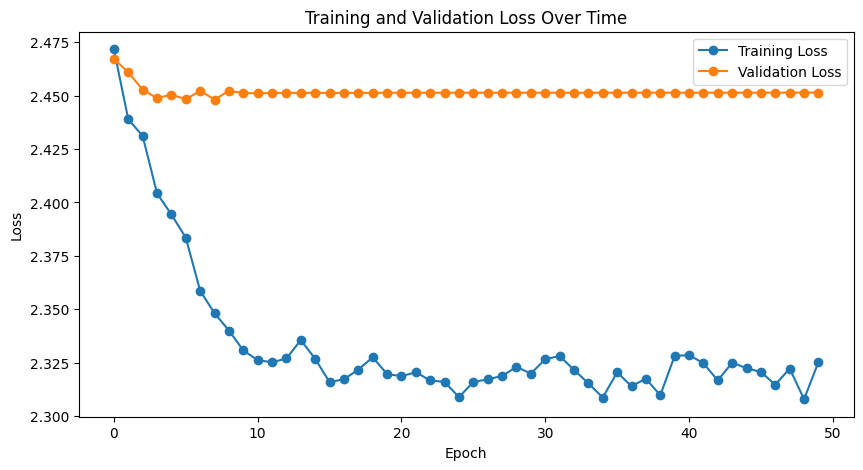


 Epoch 51 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.314
Validation Losss: 2.451


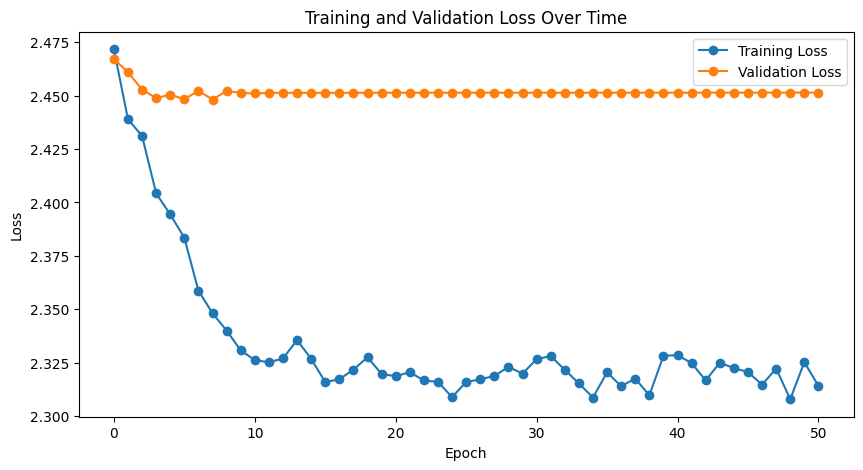


 Epoch 52 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.313
Validation Losss: 2.451


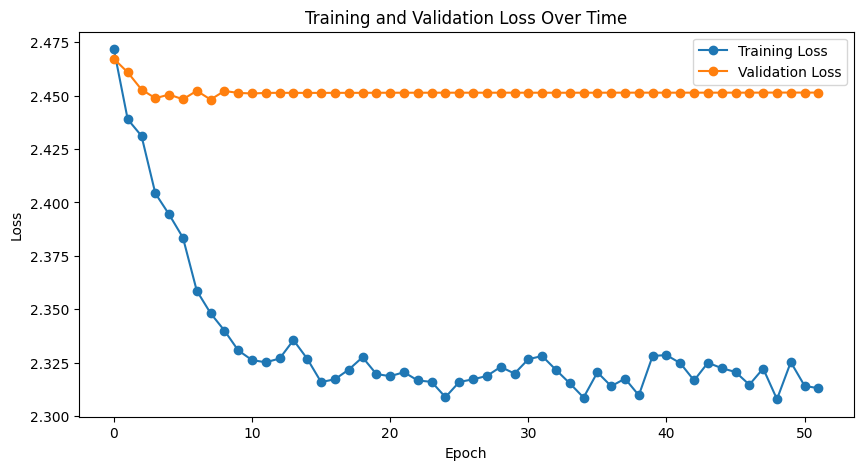


 Epoch 53 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.329
Validation Losss: 2.451


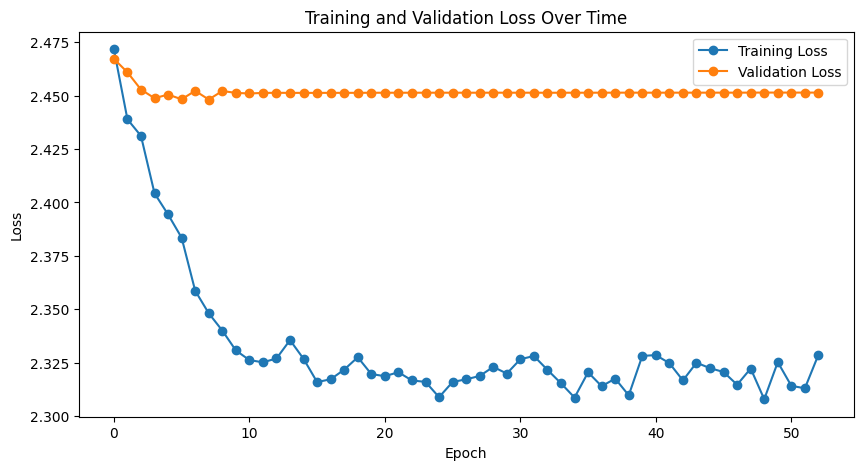


 Epoch 54 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.334
Validation Losss: 2.451


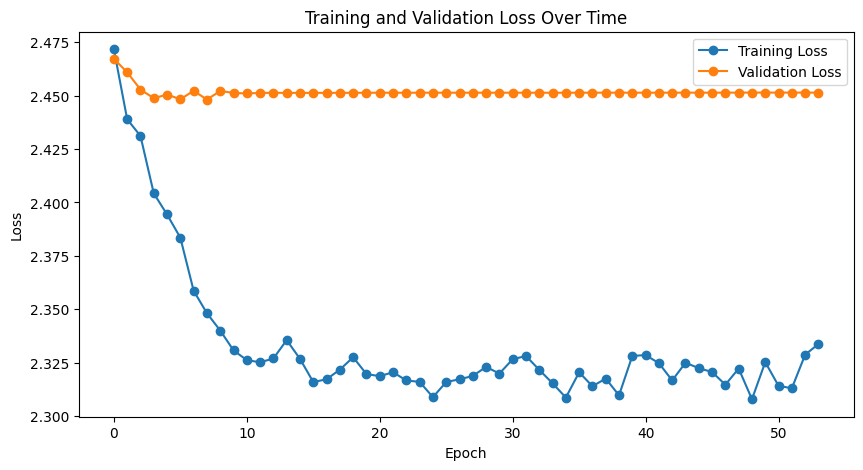


 Epoch 55 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.311
Validation Losss: 2.451


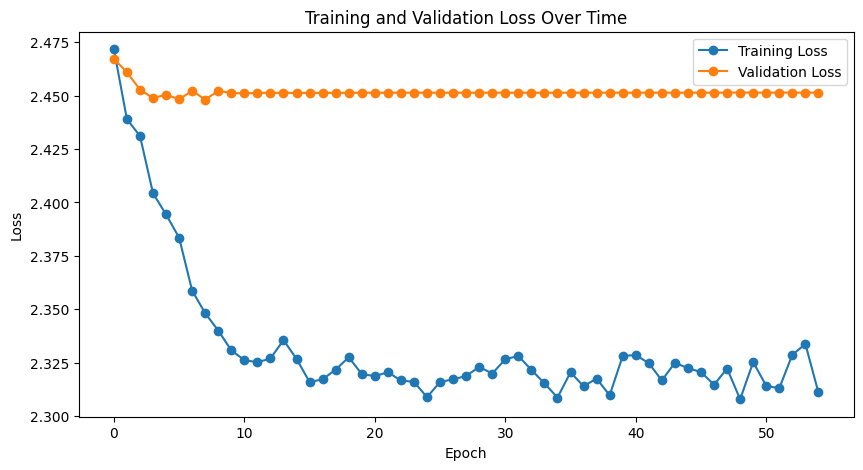


 Epoch 56 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.332
Validation Losss: 2.451


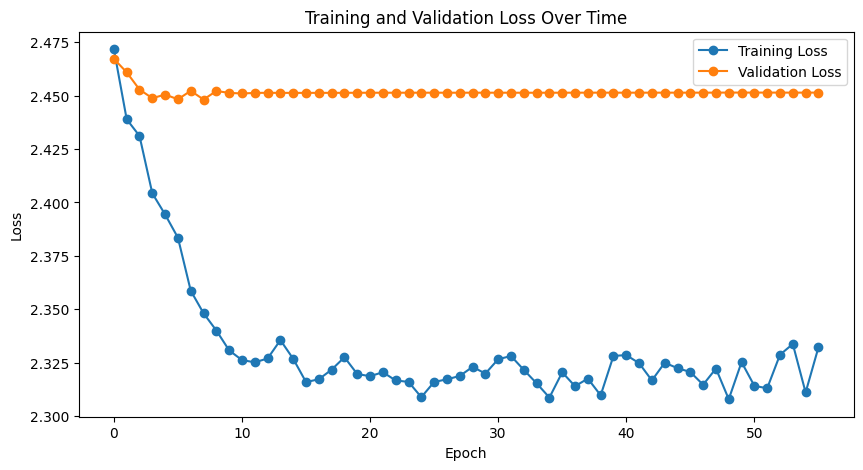


 Epoch 57 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.321
Validation Losss: 2.451


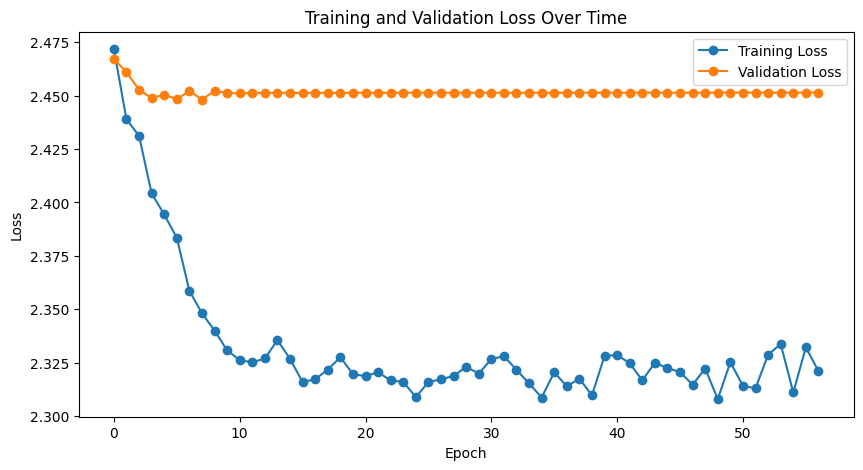


 Epoch 58 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


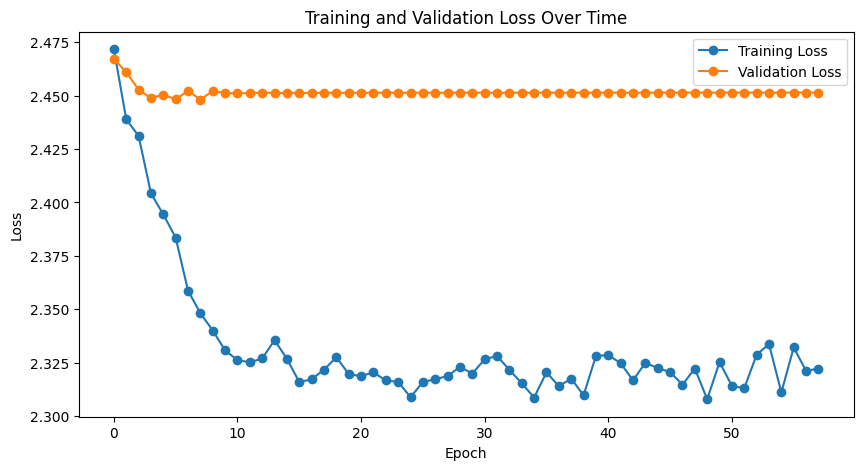


 Epoch 59 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.323
Validation Losss: 2.451


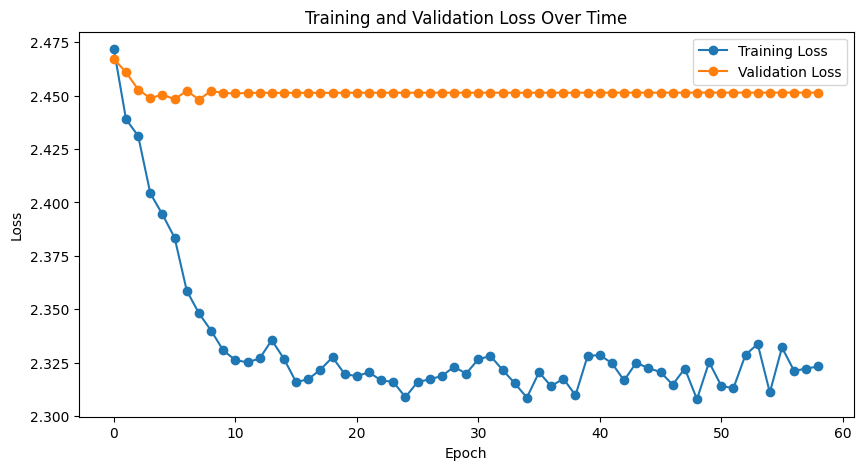


 Epoch 60 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


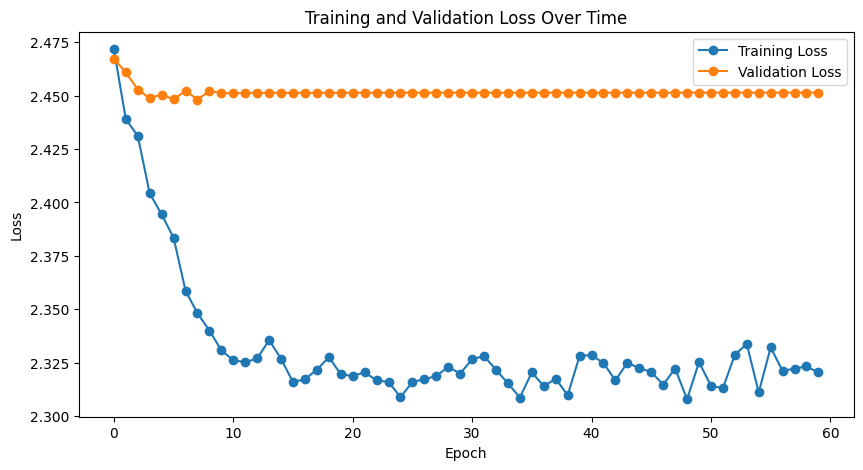


 Epoch 61 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


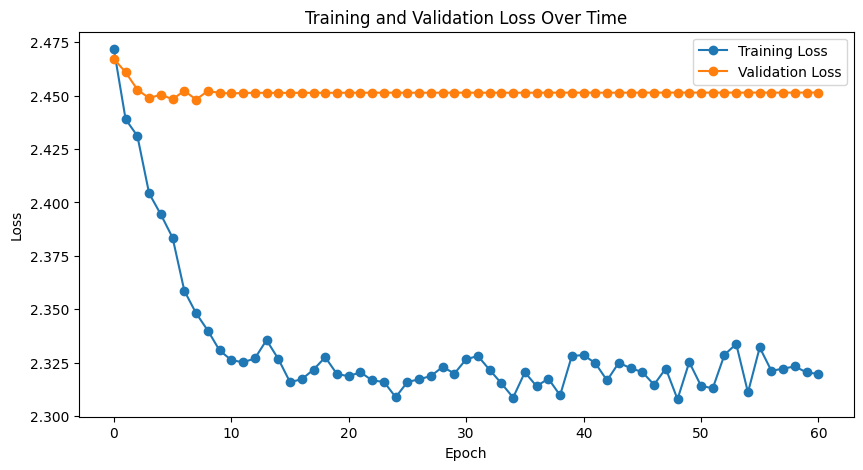


 Epoch 62 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.323
Validation Losss: 2.451


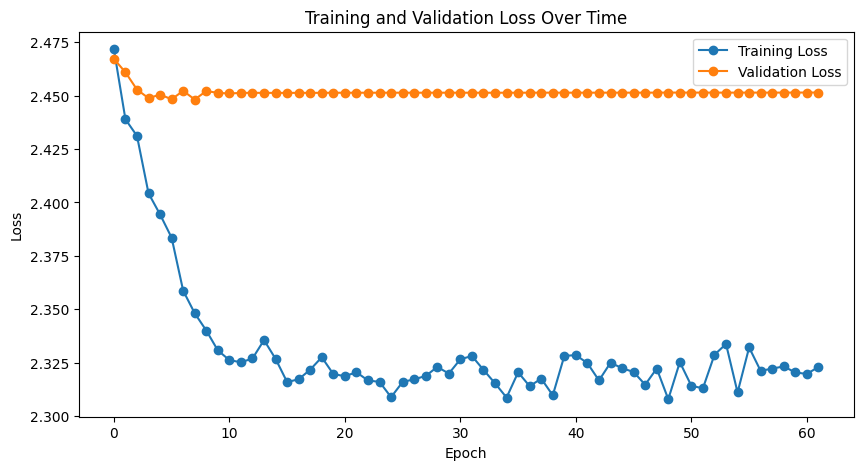


 Epoch 63 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.338
Validation Losss: 2.451


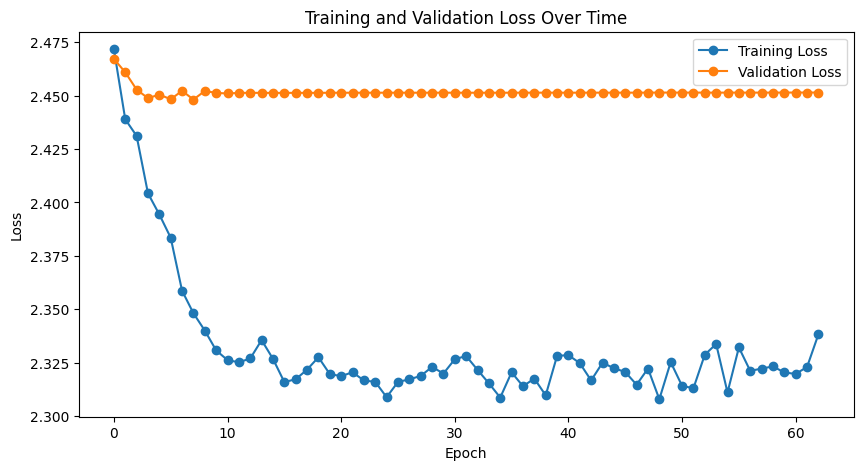


 Epoch 64 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.316
Validation Losss: 2.451


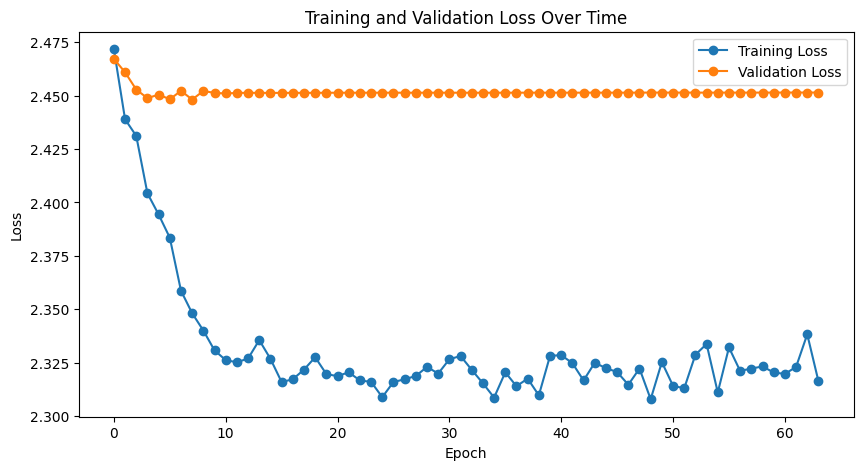


 Epoch 65 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.317
Validation Losss: 2.451


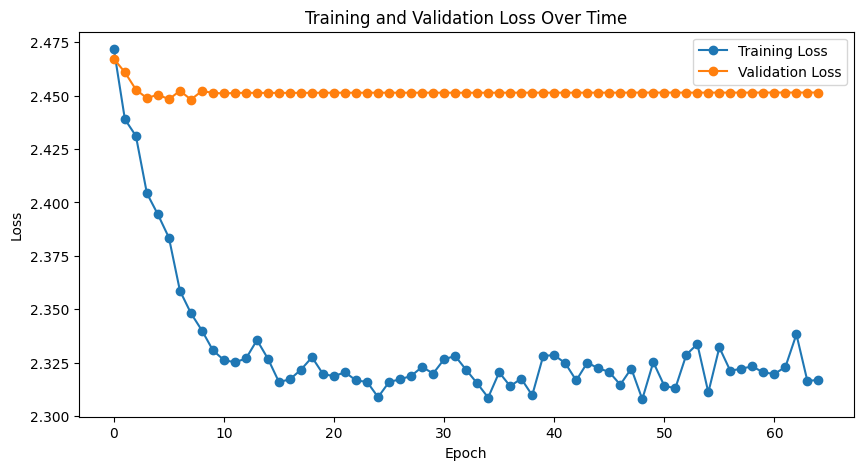


 Epoch 66 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.315
Validation Losss: 2.451


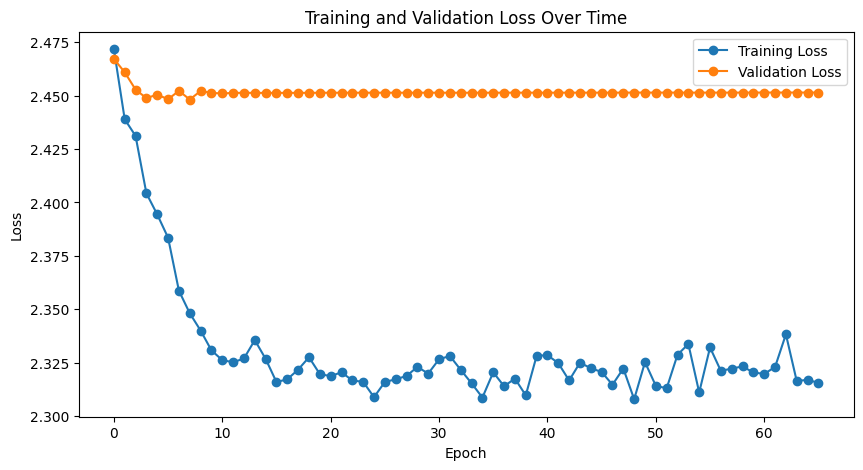


 Epoch 67 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.336
Validation Losss: 2.451


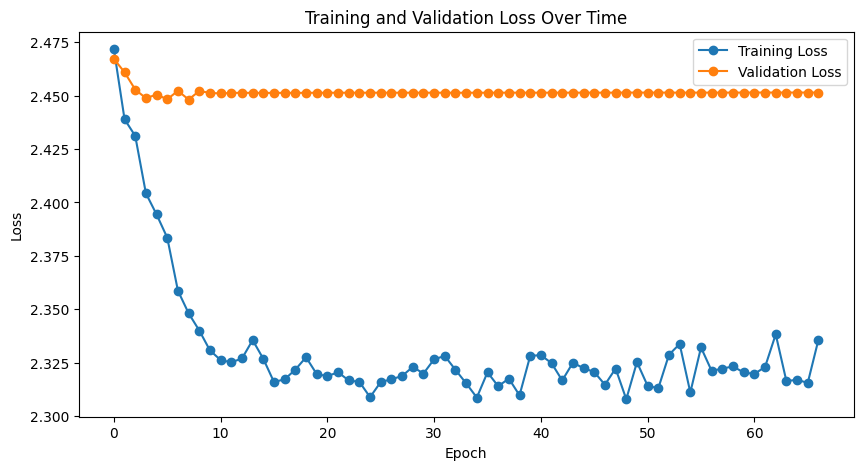


 Epoch 68 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.306
Validation Losss: 2.451


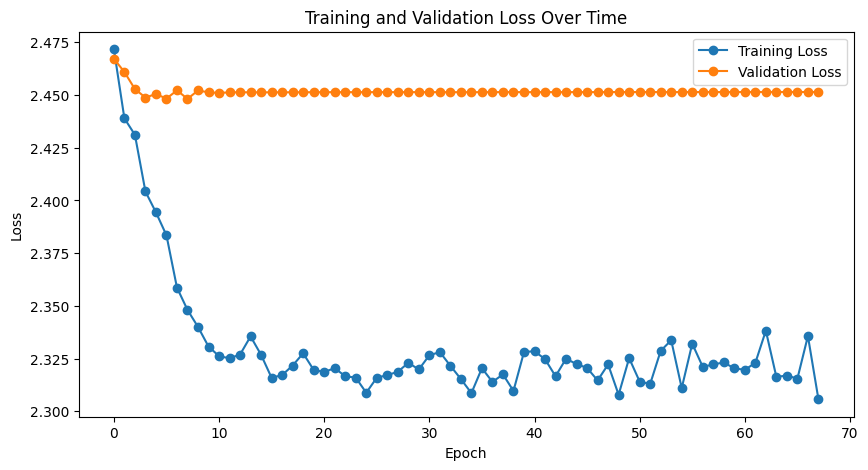


 Epoch 69 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


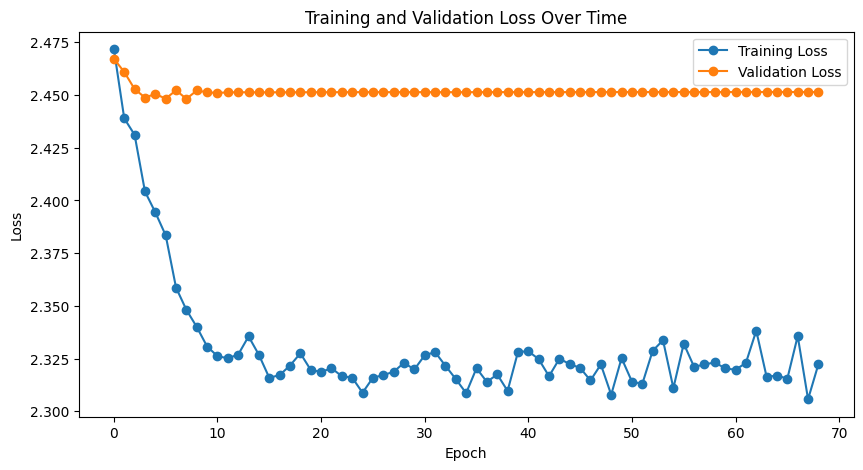


 Epoch 70 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.316
Validation Losss: 2.451


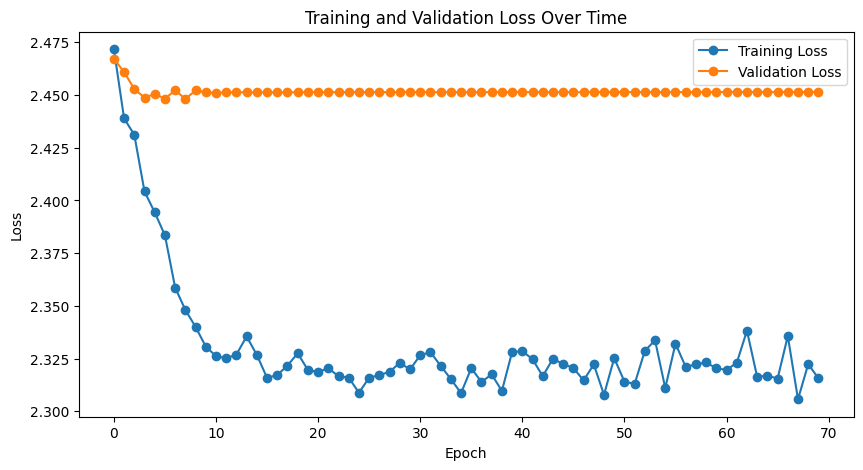


 Epoch 71 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.318
Validation Losss: 2.451


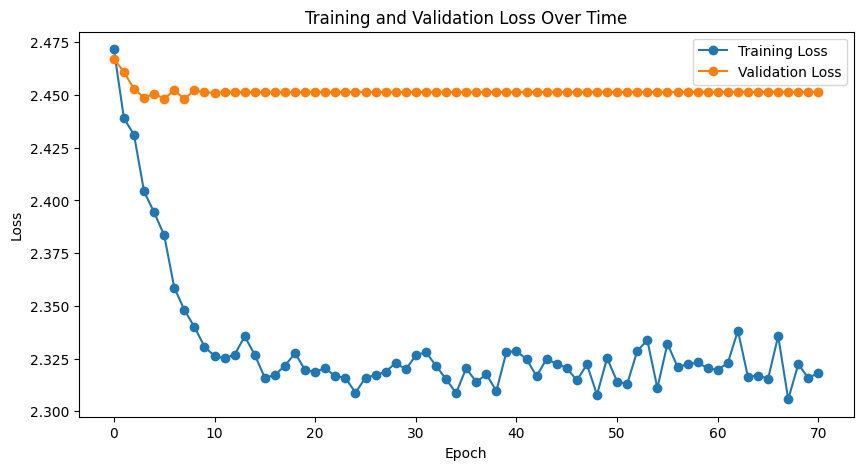


 Epoch 72 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.325
Validation Losss: 2.451


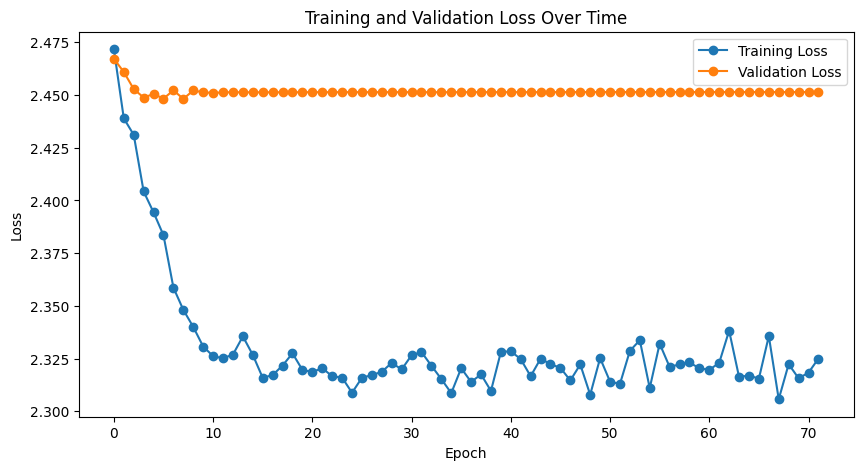


 Epoch 73 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.316
Validation Losss: 2.451


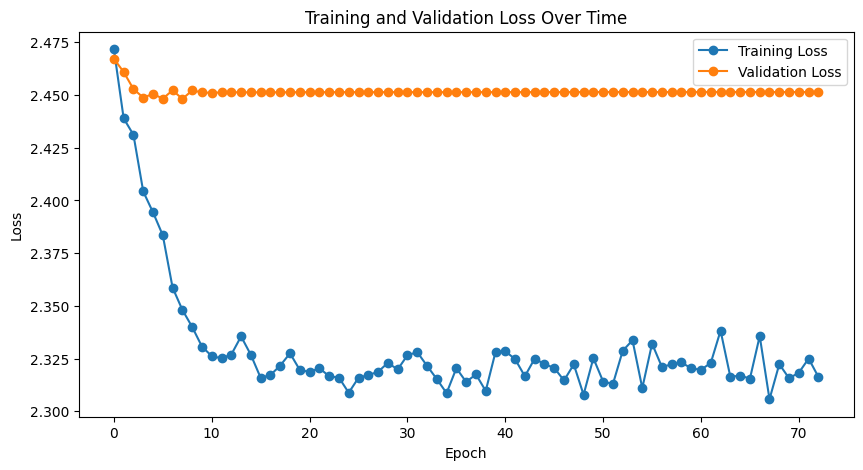


 Epoch 74 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.319
Validation Losss: 2.451


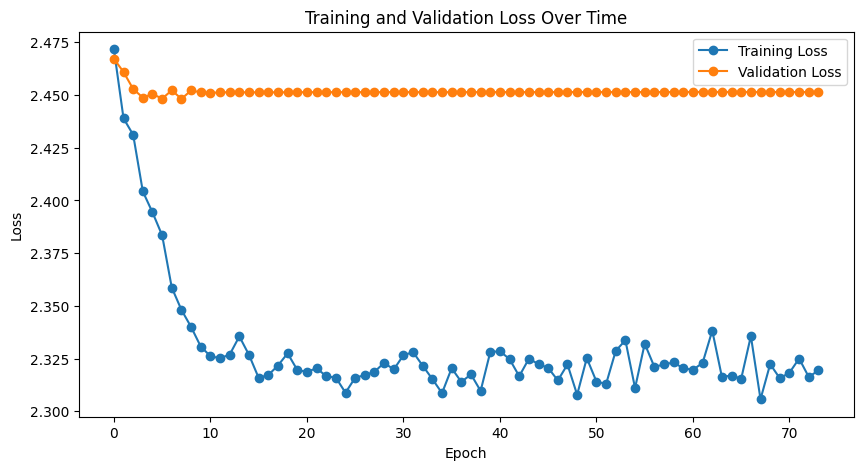


 Epoch 75 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.324
Validation Losss: 2.451


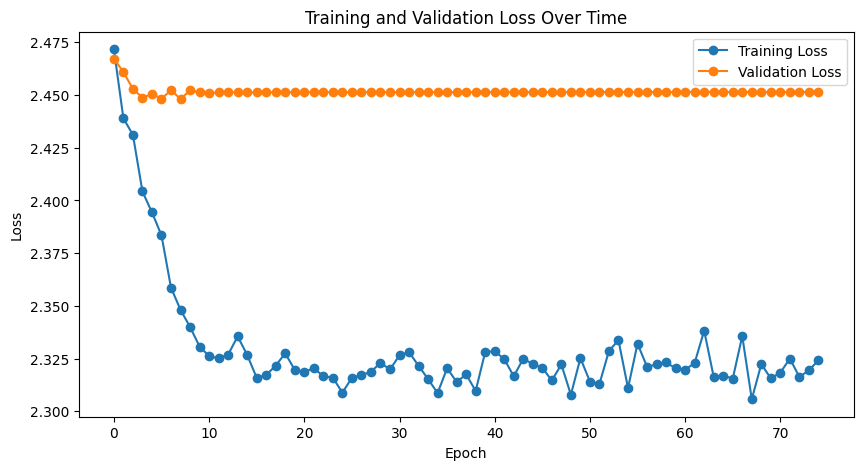


 Epoch 76 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.329
Validation Losss: 2.451


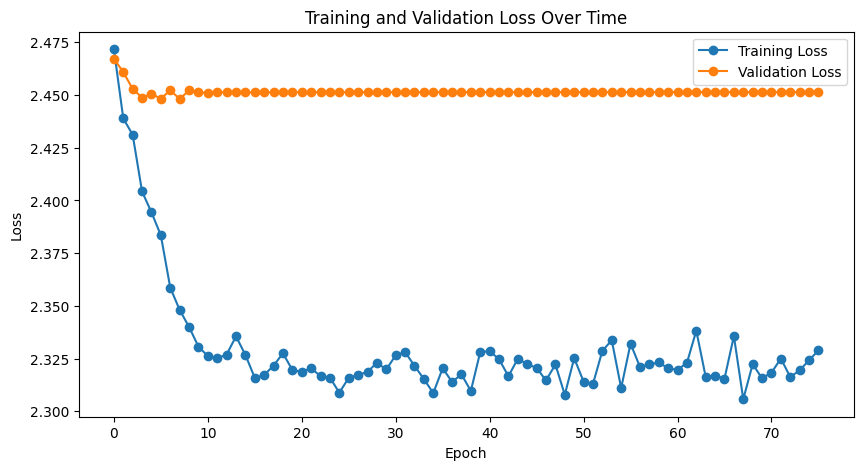


 Epoch 77 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.323
Validation Losss: 2.451


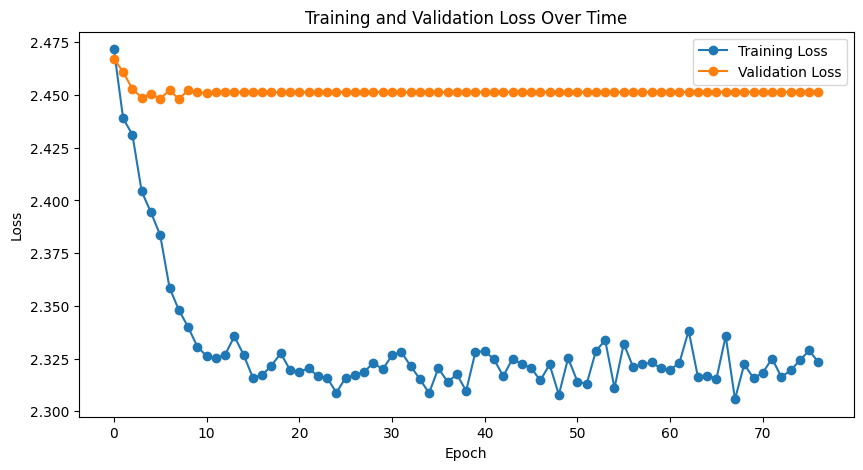


 Epoch 78 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


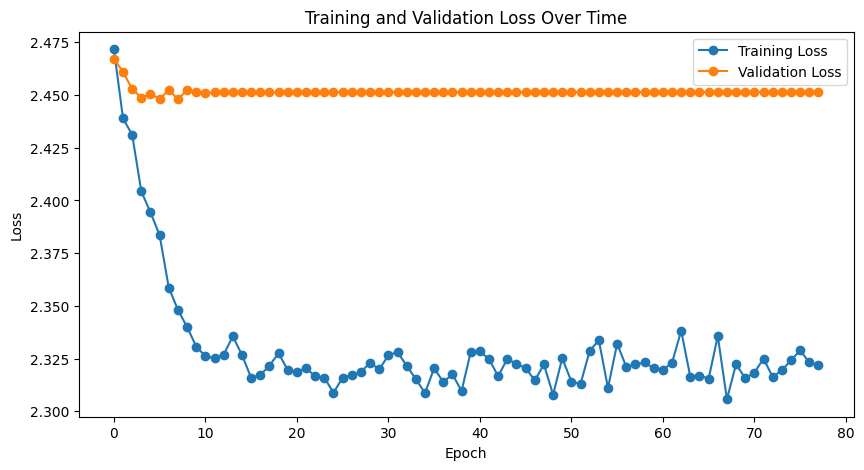


 Epoch 79 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.323
Validation Losss: 2.451


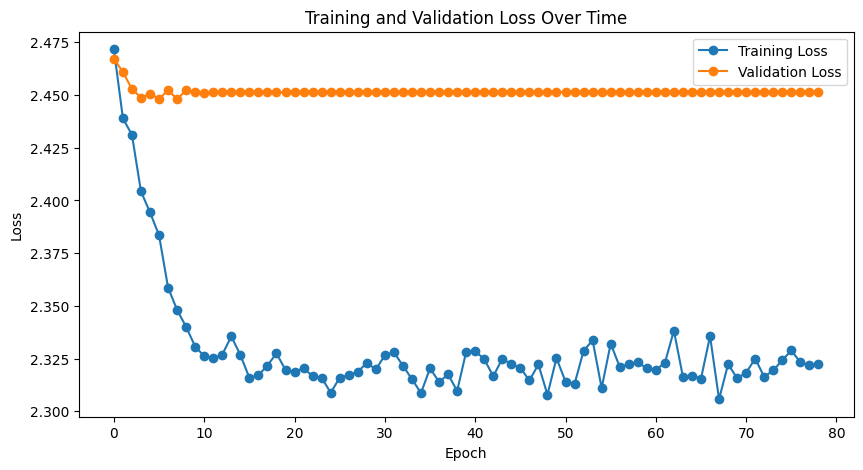


 Epoch 80 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.322
Validation Losss: 2.451


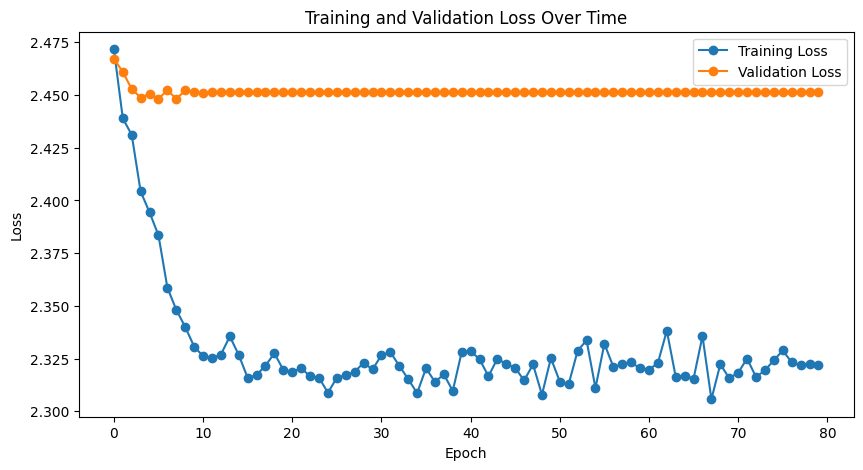


 Epoch 81 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.316
Validation Losss: 2.451


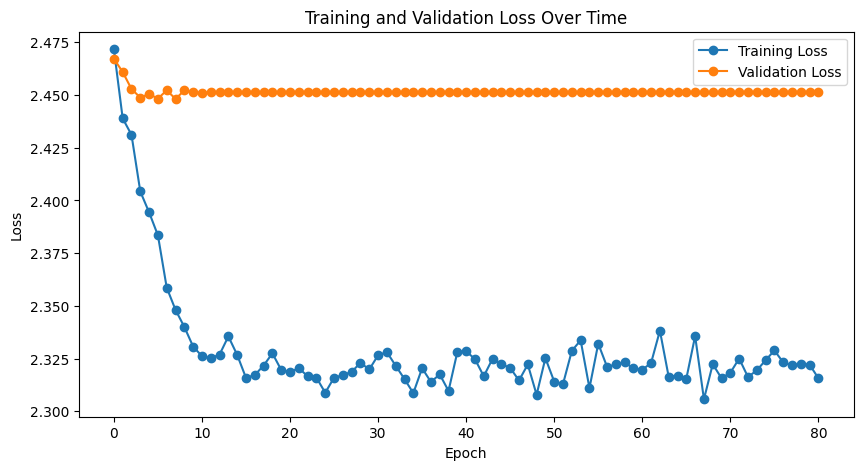


 Epoch 82 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


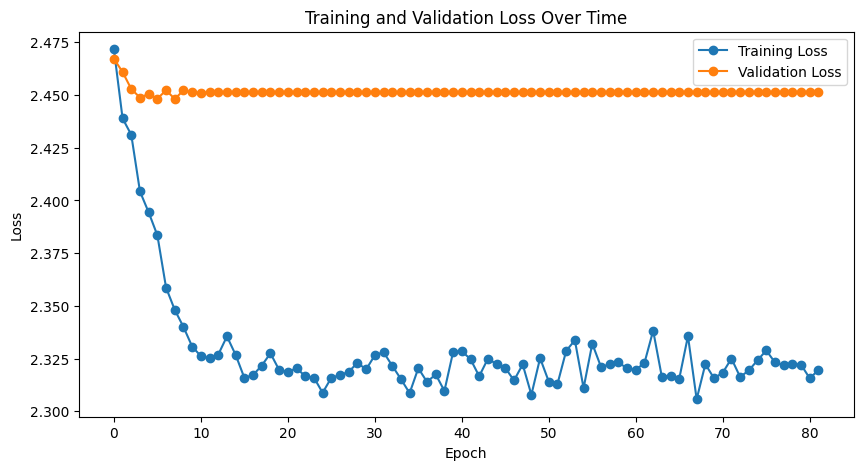


 Epoch 83 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.317
Validation Losss: 2.451


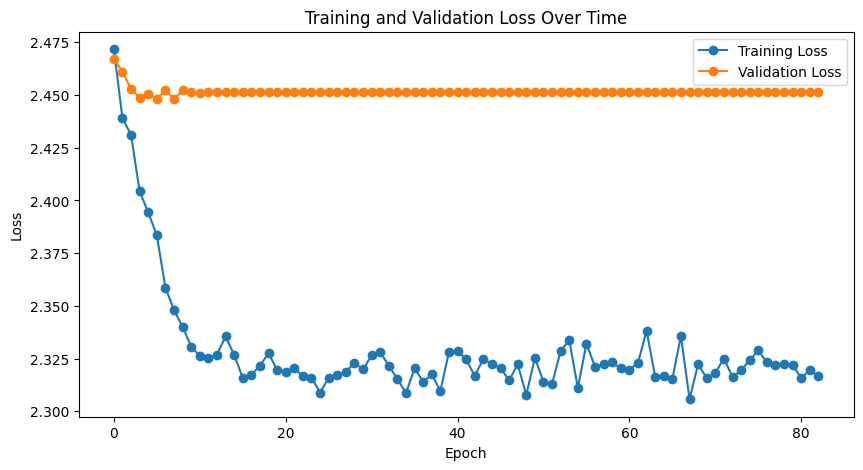


 Epoch 84 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.319
Validation Losss: 2.451


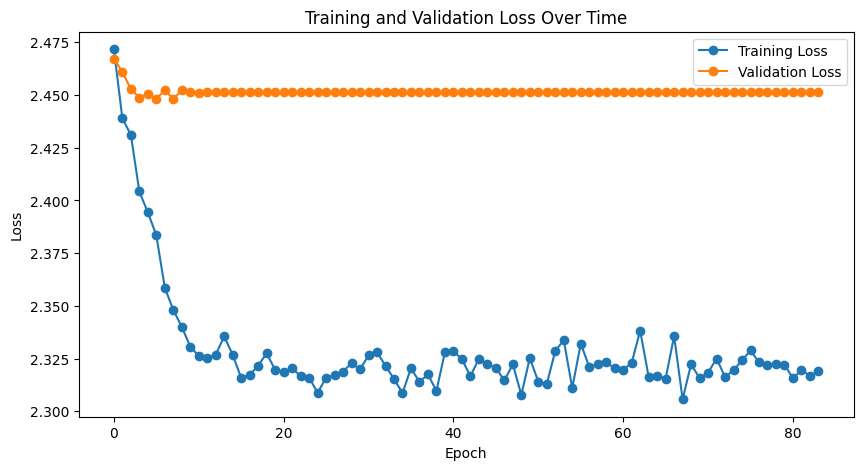


 Epoch 85 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.312
Validation Losss: 2.452


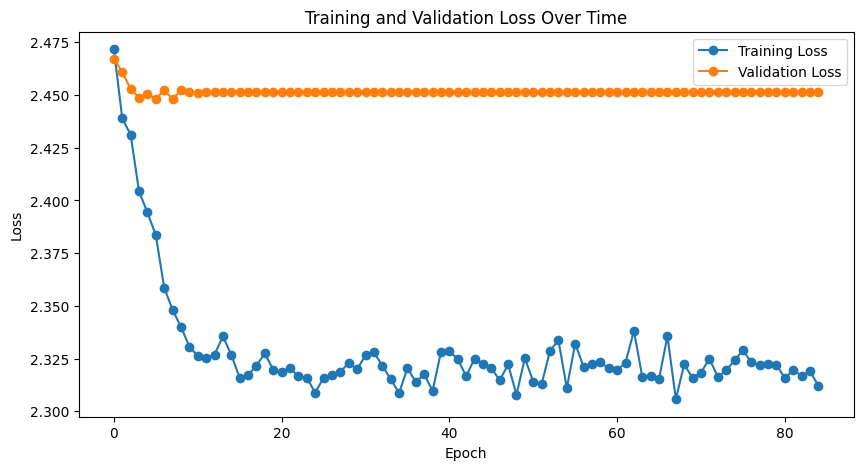


 Epoch 86 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.328
Validation Losss: 2.451


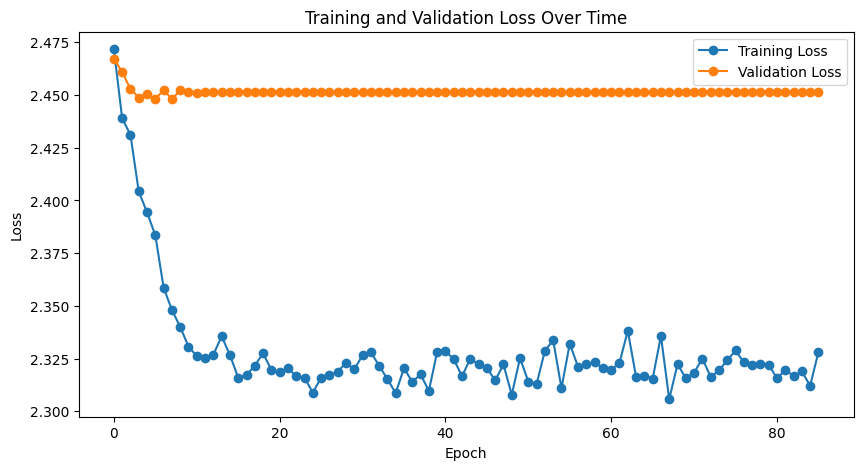


 Epoch 87 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.330
Validation Losss: 2.451


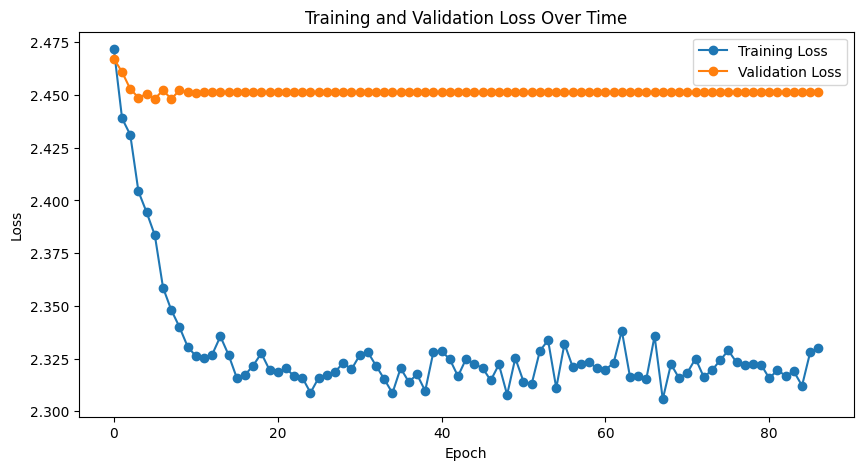


 Epoch 88 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.313
Validation Losss: 2.451


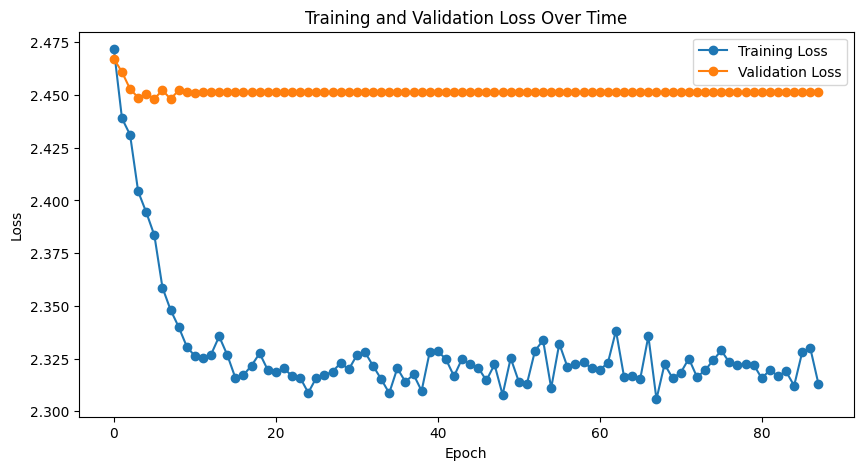


 Epoch 89 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.326
Validation Losss: 2.451


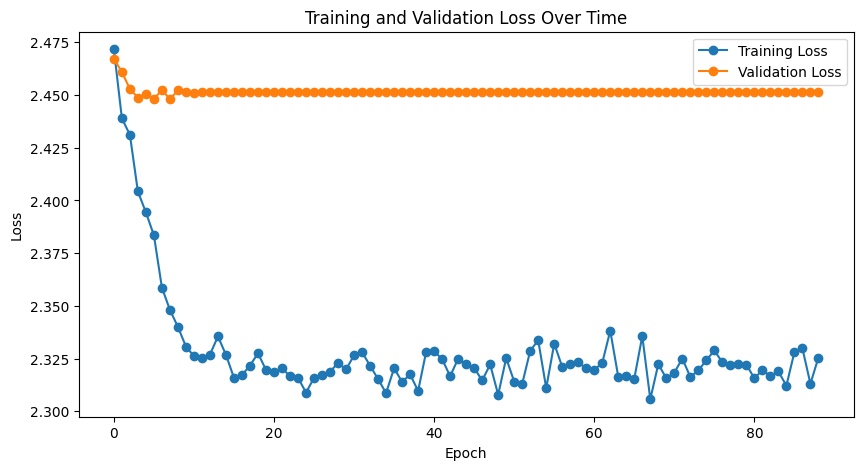


 Epoch 90 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.333
Validation Losss: 2.451


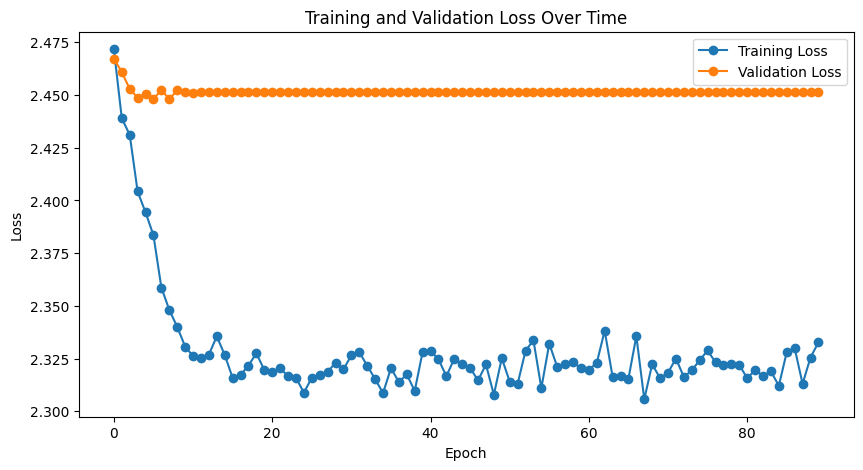


 Epoch 91 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.326
Validation Losss: 2.451


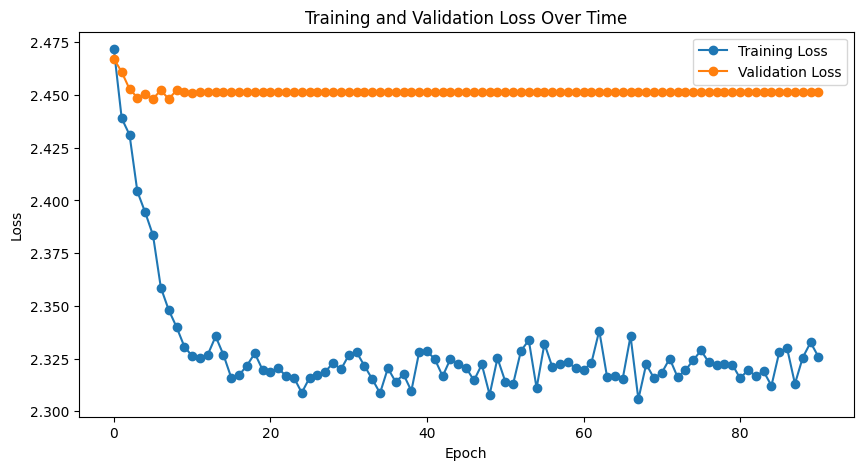


 Epoch 92 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.330
Validation Losss: 2.451


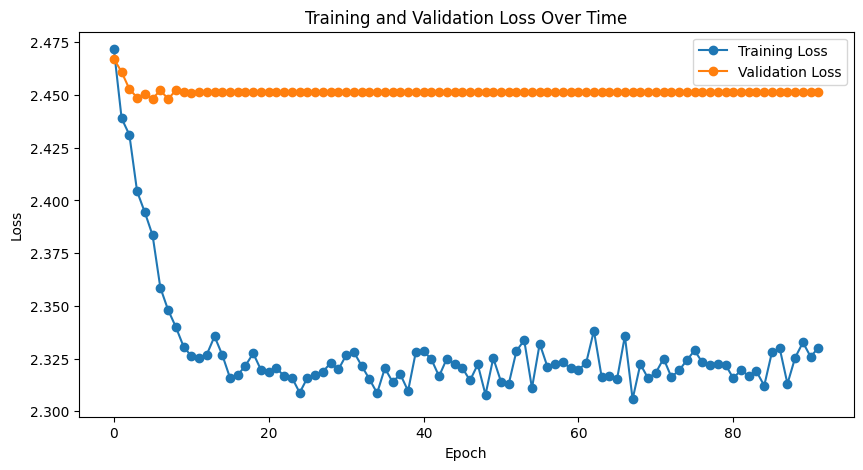


 Epoch 93 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.319
Validation Losss: 2.451


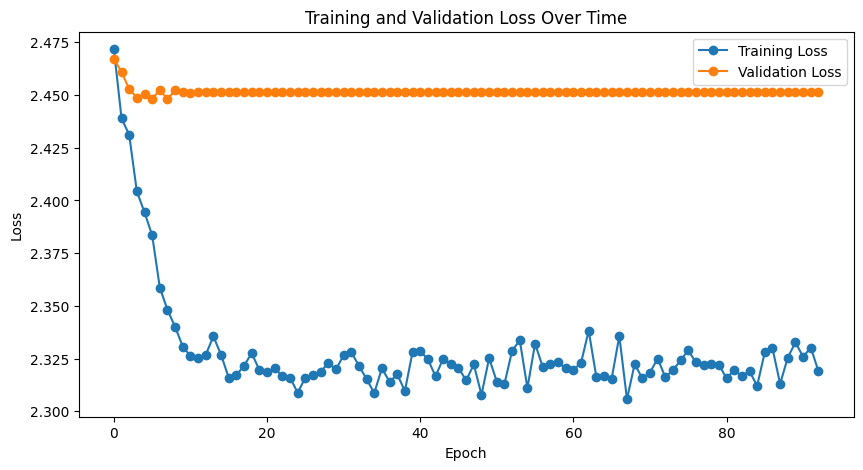


 Epoch 94 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.323
Validation Losss: 2.451


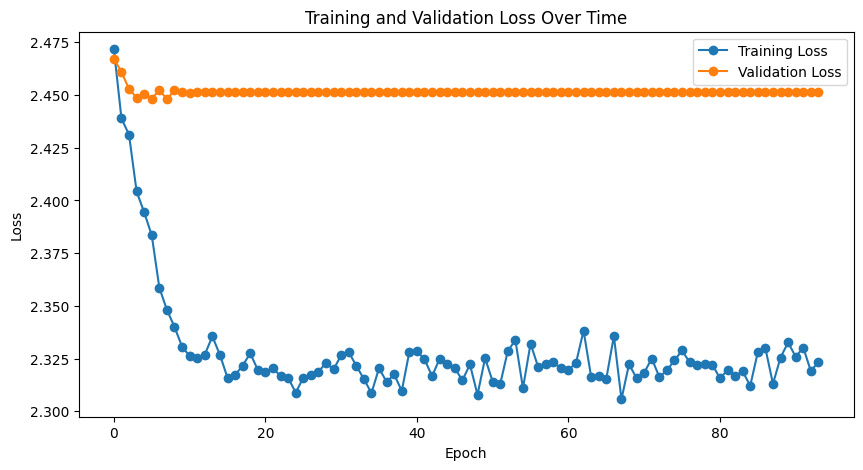


 Epoch 95 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.325
Validation Losss: 2.451


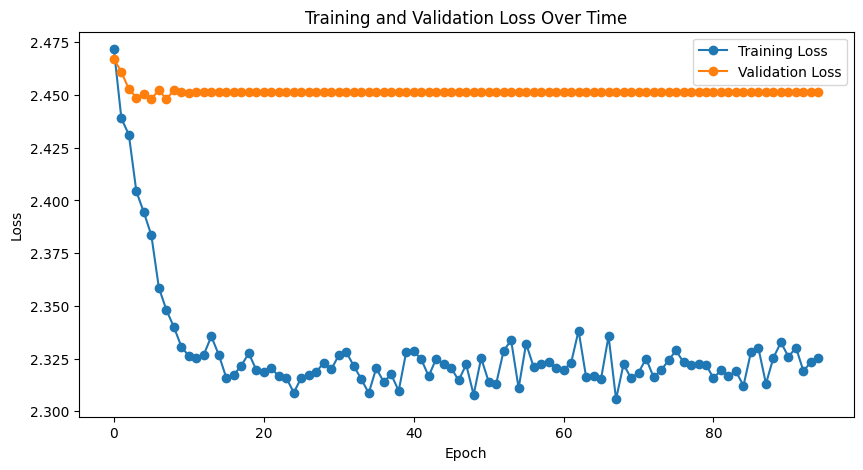


 Epoch 96 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


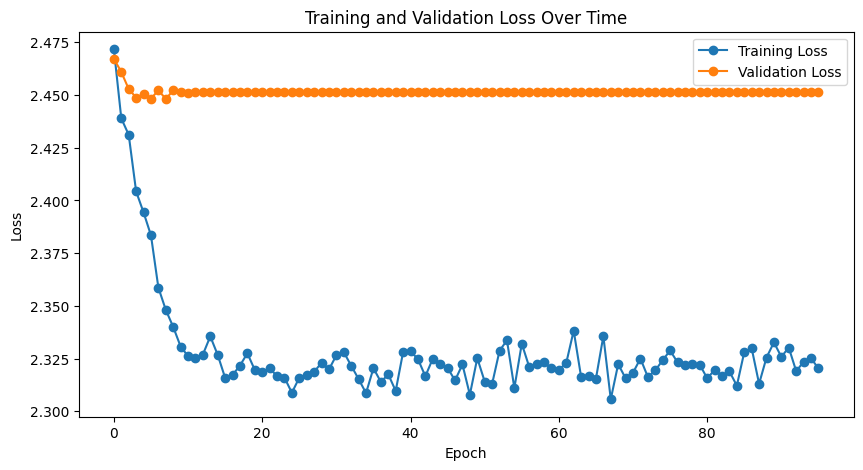


 Epoch 97 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.323
Validation Losss: 2.451


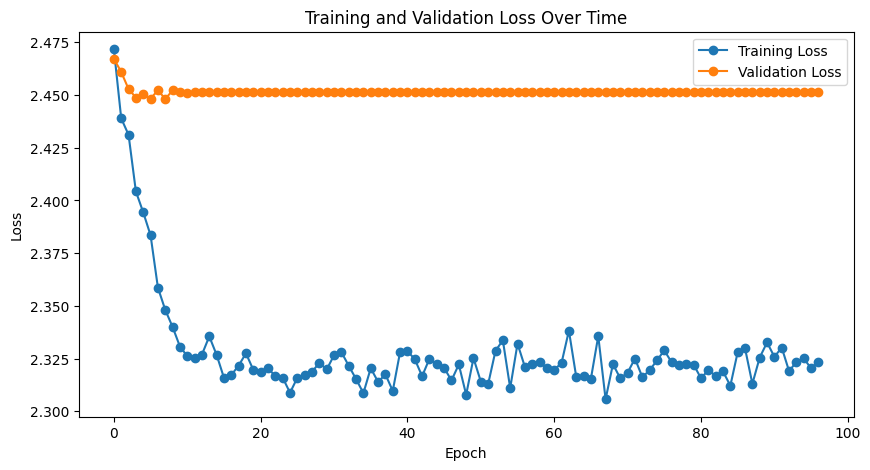


 Epoch 98 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.315
Validation Losss: 2.451


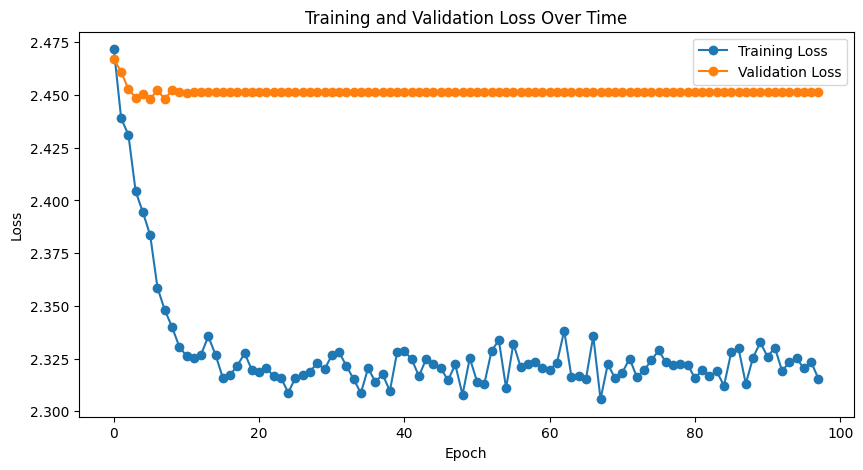


 Epoch 99 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.320
Validation Losss: 2.451


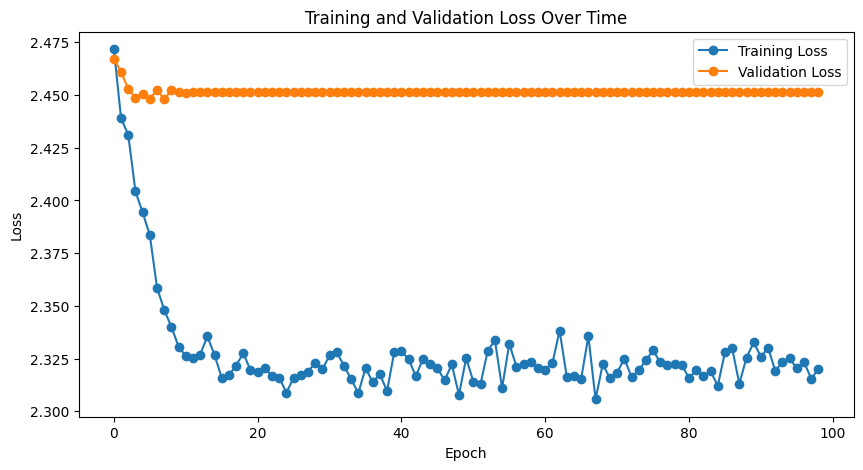


 Epoch 100 / 100
 Batch    50 of   137.
 Batch   100 of   137.

Evaluating....
Current Learning rate: 1.0000000000000004e-08

Training Loss: 2.321
Validation Losss: 2.452


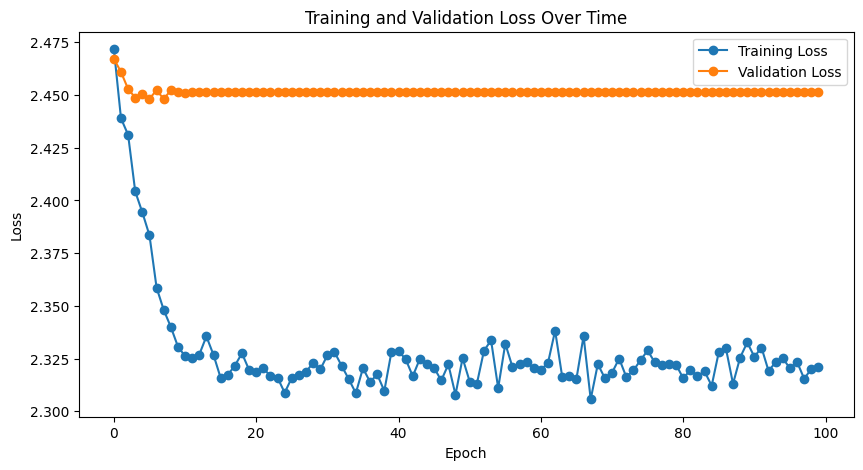

In [ ]:
# Start Fine tunning

from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
%matplotlib inline



# Set Initial loss to infinte

best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

# Set up a learning rate scheduler

scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.1, verbose=True)

# for each epoch
for epoch in range(epochs):

  print("\n Epoch {:} / {:}".format(epoch + 1, epochs))

  # train model
  train_loss, _= train()

  #evaluate model

  valid_loss, _= evaluate()

  # log the learning rate
  print(f'Current Learning rate: {optimizer.param_groups[0]["lr"]}')

  # Update the learning rate scheduler
  scheduler.step(valid_loss)

  # save the best model / early stopping check

  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'saved_weights.pt')

  # append training and validation loss
  train_losses.append(train_loss)
  valid_losses.append(valid_loss)
  print(f'\nTraining Loss: {train_loss:.3f}')
  print(f'Validation Losss: {valid_loss:.3f}')
  # Plot the training and validation losses
  plt.figure(figsize=(10, 5))
  plt.plot(train_losses, label='Training Loss', marker='o')
  plt.plot(valid_losses, label='Validation Loss', marker='o')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss Over Time')
  plt.legend()
  plt.show()



In [ ]:
# Make Predictions

# Load the weights of best model
path = '/content/saved_weights.pt'
model.load_state_dict(torch.load(path))



<All keys matched successfully>

In [ ]:
# Get Predictions for test data

with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()


OutOfMemoryError: ignored

In [ ]:
# Model Performance

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.32      1.00      0.48        12
           2       0.24      0.64      0.35        55
           3       0.38      0.65      0.48        96
           4       0.00      0.00      0.00         7
           5       0.14      0.07      0.09        29
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        72
           8       0.00      0.00      0.00         3
           9       0.83      0.44      0.57        80
          10       0.00      0.00      0.00         6
          11       0.55      0.21      0.30        58

    accuracy                           0.37       425
   macro avg       0.20      0.25      0.19       425
weighted avg       0.37      0.37      0.32       425



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
